# Smart food AI
<img src = 'https://images.unsplash.com/photo-1536390069759-2db770b49d77?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1500&q=80' width="500" height="200">

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
# Imports
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [2]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '결측치 수(null)' : df.isnull().sum(),
                       '결측치 비율(%)' : (df.isnull().sum()/len(df)).round(2),
                       '고유값 수(nunique)' : df.nunique(),
                      })
    for col in tf.index:
        tf.loc[col, '자료 내용(contents)'] = str(df[col].unique()[0:5])
        tf.loc[col, 'nan 비율'] = int(df[df[col] == 'nan'].shape[0]/len(df)*100)
        
    return tf

# Obtain data

In [3]:
path =r'D:\smart food\data'
df = pd.read_pickle(path + '/가공식품_수입식품(16년~21년).pkl')
df = df[~df['접수번호'].duplicated()]
#summary(df).to_excel('../../data/su.xlsx')
dt = pd.read_excel('../../data/su.xlsx')
cols = dt[dt['선택'] == 1]['Unnamed: 0']
df = df[cols]
df = df[~df['검사종류'].str.contains('서류')]
del df['검사종류']
df = df.dropna()

#df = df[(df['판정결과'] == '적합') | (df['판정결과'] == '부적합') | (df['판정결과'] == '자진 취하')]
df = df[(df['판정결과'] == '적합') | (df['판정결과'] == '부적합')]

df['판정결과'] = df['판정결과'].replace({'적합' : 0, '부적합': 1, '자진 취하' : 1})
df['판정결과'].value_counts(normalize=True)

df.shape
df.head()


0    0.989087
1    0.010913
Name: 판정결과, dtype: float64

(340417, 29)

해외제조업소명             해외제조업소 지역  \
1                        CAVENDISH FARMS CORPORATION  PRINCE EDWARD ISLAND   
2                             HAKURYU SHUZOU CO.,LTD               NIIGATA   
3  GUIYANG NANMING LAOGANMA SPECIAL FLAVOUR FOODS...               GUIZHOU   
4                                       MICHEL LYNCH    NOUVELLE-AQUITAINE   
5                 QINGDAO LONG YUAN FA FOODS CO.,LTD              SHANDONG   

                   품목코드    품목명  판정결과 진균수시험대상 주문자상표부착                제품명(한글)  \
1  C0130030000000000000  서류가공품     0       N     아니오                스트레이트 컷   
2  C0127030000000000000     청주     0       N     아니오      간바래 오도상팩(900미리리터)   
3  C0121020000000000000    소스류     0       N     아니오             정제뉴러우 유라죠우   
4  C0127050000000000000    과실주     0       N     아니오  미쉘 린치 보르도 멜로 까베르네 소비뇽   
5  C0102030000000000000    만두류     0       N     아니오                    사색교   

  제조국(원산지)                  접수일  ...       수입화주 상호              선적항명  \
1      캐나다  2016-05-31 09:50:09  ...    (주)코스트코코리아           Halifax   
2       일본  2016-06-02 09:28:22  ...       (주)태산주류  Niigata, Niigata   
3       중국  2016-06-14 11:35:10  ...       녹청물산(주)          Shanghai   
4      프랑스  2016-02-18 09:21:09  ...  주식회사 동원와인플러스       Fos sur Mer   
5       중국  2016-02-16 09:40:21  ...         (주)랜시       Qingdao,CN    

          선적일 방사선조사식품        반입일자  대행업자 사업자등록번호 과세가격($/Kg)     과세가격  고열량.저영양  \
1  2016-04-11       N  2016-05-30  1.298137e+09      1.238  24073.2     해당없음   
2  2016-05-19       N  2016-05-26  1.291569e+09      3.636  94247.0     해당없음   
3  2016-06-02       N  2016-06-13  1.218176e+09      2.004   3030.0     해당없음   
4  2016-01-06       N  2016-02-12  1.358116e+09      5.733   1032.0     해당없음   
5  2016-02-03       N  2016-02-11  1.218183e+09      4.540   9807.0     해당없음   

  가온보존대상  
1      N  
2      N  
3      N  
4      N  
5      N  

[5 rows x 29 columns]

# 0. 제조공정 데이터 확보

from glob import glob
dir_path = r'D:\스마트 수입식품\data\수입신고서접수내역2(2016-2020)'
files = glob(dir_path + '/*공정*.xl*')
files

fil_lists = ['D:\\스마트 수입식품\\data\\수입신고서접수내역2(2016-2020)\\04제조공정_2016.xlsx',
 'D:\\스마트 수입식품\\data\\수입신고서접수내역2(2016-2020)\\04제조공정_2017.xlsx',
 'D:\\스마트 수입식품\\data\\수입신고서접수내역2(2016-2020)\\04제조공정_2018.xlsx',
 'D:\\스마트 수입식품\\data\\수입신고서접수내역2(2016-2020)\\04제조공정_2019.xlsx',
 'D:\\스마트 수입식품\\data\\수입신고서접수내역2(2016-2020)\\04제조공정_2020.xlsx',
# 'D:\\스마트 수입식품\\data\\수입신고서접수내역2(2016-2020)\\04제조공정_2021.xlsx'
            ]

from tqdm import tqdm_notebook

sf = pd.DataFrame()
sum = 0
for file in  tqdm_notebook(fil_lists):
    wb = pd.ExcelFile(file)
    year = file.split('\\')[1].split('.')[0] # 년도만 읽기
    for sheet in wb.sheet_names :
        print(year + sheet)
        data = pd.read_excel(wb, sheet, usecols=[0, 4])
        sum += data.shape[0]
        sf = sf.append(data)
    print('*'*100)
    
print(f'총 instance는 {sum}개')
sf.shape
sf.to_pickle('../../data/제조공정.pkl')

# 수입식품 민원 건별로 제조공정 변수화 (wide format)

In [4]:
manu = pd.read_pickle('../../data/제조공정.pkl')
manu['건수'] = 1
manu_wide = manu.pivot_table(index='접수번호', columns='제조공정분류명칭', values='건수').fillna(0)
manu_wide.reset_index(inplace=True)
manu_wide

제조공정분류명칭          접수번호   가당   가미   가수  가수분해   가압  가압+탈수+원심분리   가열  가열+성형   가염  \
0          20150369710  0.0  0.0  0.0   0.0  0.0         0.0  0.0    0.0  0.0   
1          20150404180  0.0  0.0  0.0   0.0  0.0         0.0  0.0    0.0  0.0   
2          20150652584  0.0  0.0  0.0   0.0  0.0         0.0  0.0    0.0  0.0   
3          20150751781  0.0  0.0  0.0   0.0  0.0         0.0  0.0    0.0  0.0   
4          20150853501  0.0  0.0  0.0   0.0  0.0         0.0  0.0    0.0  0.0   
...                ...  ...  ...  ...   ...  ...         ...  ...    ...  ...   
1731975   IFGA16120108  0.0  0.0  0.0   0.0  0.0         0.0  0.0    0.0  0.0   
1731976   IFGA16120109  0.0  0.0  0.0   0.0  0.0         0.0  0.0    0.0  0.0   
1731977   IFGA16120110  0.0  0.0  0.0   0.0  0.0         0.0  1.0    0.0  0.0   
1731978   IFGA16120111  0.0  0.0  0.0   0.0  0.0         0.0  1.0    0.0  1.0   
1731979   IFGA16120115  0.0  0.0  0.0   0.0  0.0         0.0  0.0    0.0  0.0   

제조공정분류명칭  ...  효소처리(트랜스글루타미나아제)  효소처리(트립신)  효소처리(파파인)  효소처리(펙티나아제)  \
0         ...               0.0        0.0        0.0          0.0   
1         ...               0.0        0.0        0.0          0.0   
2         ...               0.0        0.0        0.0          0.0   
3         ...               0.0        0.0        0.0          0.0   
4         ...               0.0        0.0        0.0          0.0   
...       ...               ...        ...        ...          ...   
1731975   ...               0.0        0.0        0.0          0.0   
1731976   ...               0.0        0.0        0.0          0.0   
1731977   ...               0.0        0.0        0.0          0.0   
1731978   ...               0.0        0.0        0.0          0.0   
1731979   ...               0.0        0.0        0.0          0.0   

제조공정분류명칭  효소처리(포스포리파아제)  효소처리(프로테아제)  효소처리(헤미셀룰라아제)  후발효   훈연   희석  
0                   0.0          0.0            0.0  0.0  0.0  0.0  
1                   0.0          0.0            0.0  0.0  0.0  0.0  
2                   0.0          0.0            0.0  0.0  0.0  0.0  
3                   0.0          0.0            0.0  0.0  0.0  0.0  
4                   0.0          0.0            0.0  0.0  0.0  0.0  
...                 ...          ...            ...  ...  ...  ...  
1731975             0.0          0.0            0.0  0.0  0.0  0.0  
1731976             0.0          0.0            0.0  0.0  0.0  0.0  
1731977             0.0          0.0            0.0  0.0  0.0  0.0  
1731978             0.0          0.0            0.0  0.0  0.0  0.0  
1731979             0.0          0.0            0.0  0.0  0.0  0.0  

[1731980 rows x 206 columns]

In [5]:
tf =df.copy()

In [6]:
df = df.merge(manu_wide, on ='접수번호')
df

해외제조업소명                해외제조업소 지역  \
0                            MICHEL LYNCH       NOUVELLE-AQUITAINE   
1      QINGDAO LONG YUAN FA FOODS CO.,LTD                 SHANDONG   
2                    HARIBO GMBH & CO. KG      NORDRHEIN-WESTFALEN   
3              YUNNAN LANDSUN TEA CO.,LTD                   YUNNAN   
4                MUSASHINO FOODS CO.,LTD.                  FUKUOKA   
...                                   ...                      ...   
36997                     CHARLES NOELLAT  BOURGOGNE-FRANCHE-COMTE   
36998                    H.&J. BRUGGEN KG       SCHLESWIG-HOLSTEIN   
36999            NOUSHIG INC DBA AMORETTI               CALIFORNIA   
37000                    DIRICOM SA DE CV         CIUDAD DE MEXICO   
37001        GRANDS VINS DE GIRONDE - GVG       NOUVELLE-AQUITAINE   

                       품목코드      품목명  판정결과 진균수시험대상 주문자상표부착  \
0      C0127050000000000000      과실주     0       N     아니오   
1      C0102030000000000000      만두류     0       N     아니오   
2      C0101020000004000000  캔디류(젤리)     0       N     아니오   
3      C0116010000000000000      침출차     0       N     아니오   
4      C0115010000000000000       국수     0       N     아니오   
...                     ...      ...   ...     ...     ...   
36997  C0314180000000000000      과실주     0       N     아니오   
36998  C0315070200000000000    곡류가공품     0       N       예   
36999  C0304070000000000000    당류가공품     0       N     아니오   
37000  C0307030300000000000      향미유     0       N     아니오   
37001  C0314180000000000000      과실주     0       N     아니오   

                                    제품명(한글) 제조국(원산지)                  접수일  \
0                     미쉘 린치 보르도 멜로 까베르네 소비뇽      프랑스  2016-02-18 09:21:09   
1                                       사색교       중국  2016-02-16 09:40:21   
2                                   하리보스타믹스       독일  2016-02-19 13:15:39   
3                                       보이차       중국  2016-02-18 09:47:30   
4                                    냉동유대우동       일본  2016-02-18 16:45:13   
...                                     ...      ...                  ...   
36997  샤를 노엘라 뉘 생 조르쥬 프리미에 크뤼 클로 데 코르베 2016      프랑스  2020-09-28 11:12:35   
36998                         홀 그레인 오트 그래놀라       독일  2020-12-15 11:01:56   
36999                        피나콜라다시럽(750ml)       미국  2020-11-10 11:12:41   
37000                           아보카도오일 (마늘)      멕시코  2020-07-14 09:49:11   
37001                            샤또 베사드 보르도      프랑스  2020-08-18 10:02:54   

       ... 효소처리(트랜스글루타미나아제) 효소처리(트립신) 효소처리(파파인) 효소처리(펙티나아제) 효소처리(포스포리파아제)  \
0      ...              0.0       0.0       0.0         0.0           0.0   
1      ...              0.0       0.0       0.0         0.0           0.0   
2      ...              0.0       0.0       0.0         0.0           0.0   
3      ...              0.0       0.0       0.0         0.0           0.0   
4      ...              0.0       0.0       0.0         0.0           0.0   
...    ...              ...       ...       ...         ...           ...   
36997  ...              0.0       0.0       0.0         0.0           0.0   
36998  ...              0.0       0.0       0.0         0.0           0.0   
36999  ...              0.0       0.0       0.0         0.0           0.0   
37000  ...              0.0       0.0       0.0         0.0           0.0   
37001  ...              0.0       0.0       0.0         0.0           0.0   

      효소처리(프로테아제) 효소처리(헤미셀룰라아제)  후발효   훈연   희석  
0             0.0           0.0  0.0  0.0  0.0  
1             0.0           0.0  0.0  0.0  0.0  
2             0.0           0.0  0.0  0.0  0.0  
3             0.0           0.0  0.0  0.0  0.0  
4             0.0           0.0  0.0  0.0  0.0  
...           ...           ...  ...  ...  ...  
36997         0.0           0.0  1.0  0.0  0.0  
36998         0.0           0.0  0.0  0.0  0.0  
36999         0.0           0.0  0.0  0.0  0.0  
37000         0.0           0.0  0.0  0.0  0.0  
37001         0.0           0.0  0.0  0.0  0.0  

[37002 ro

### 아래 그림에는 target의 값이 반영되어 나타남

In [7]:
df['판정결과'].value_counts()

0    36637
1      365
Name: 판정결과, dtype: int64

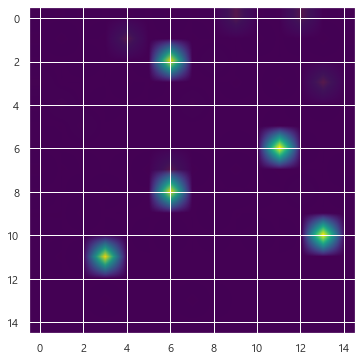

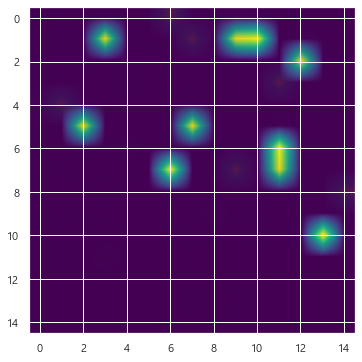

In [8]:
plt.rcParams["figure.figsize"] = (8,6)
from tqdm import tqdm

for i in [0,1]:
    data = df[df['판정결과'] == i]
    for z in np.random.choice(len(data), 365):
        a = data.iloc[:, 29:].values[z]
        a = np.r_[a, [0]*20].reshape(15,15)
        
        ax = plt.imshow(a, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear')
    plt.show()

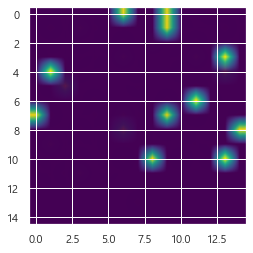

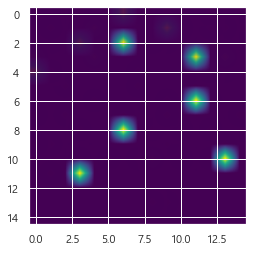

****************************************************************************************************


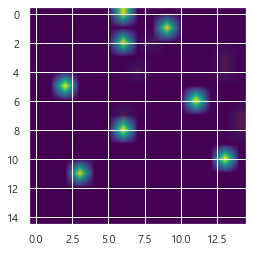

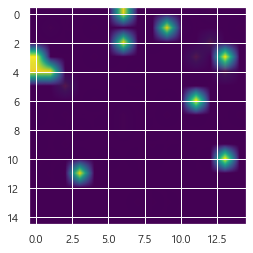

****************************************************************************************************


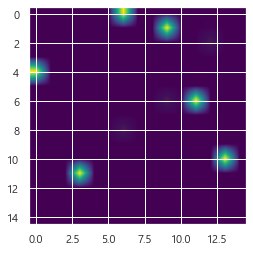

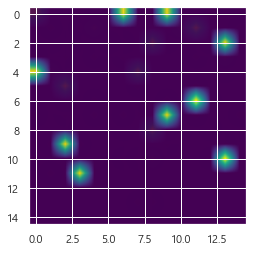

****************************************************************************************************


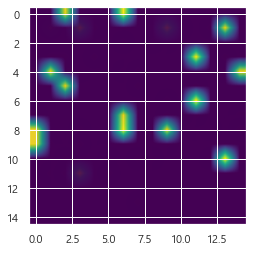

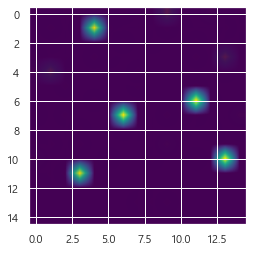

****************************************************************************************************


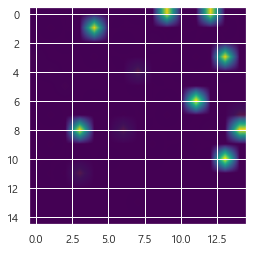

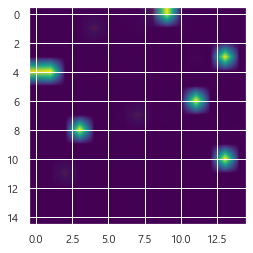

****************************************************************************************************


In [9]:
plt.rcParams["figure.figsize"] = (5,4)
from tqdm import tqdm
for i in range(5):
    np.random.seed(np.random.randint(1000))
    for i in [0,1]:
        data = df[df['판정결과'] == i]
        for z in np.random.choice(len(data), 200, replace=False):
            a = data.iloc[:, 29:].values[z]
            a = np.r_[a, [0]*20].reshape(15,15)

            ax = plt.imshow(a, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear')
        plt.show()
    print('*'*100)

### 제조공정 행렬만 사용하여 예측하려고

In [10]:
data  = df.iloc[:, 29:]
data['판정결과'] = df['판정결과']
data
data.drop('판정결과', axis=1).shape

가당   가미   가수  가수분해   가압  가압+탈수+원심분리   가열  가열+성형   가염   건조  ...  \
0      0.0  0.0  0.0   0.0  0.0         0.0  0.0    0.0  0.0  0.0  ...   
1      0.0  0.0  0.0   0.0  0.0         0.0  1.0    0.0  0.0  0.0  ...   
2      0.0  0.0  0.0   0.0  0.0         0.0  0.0    0.0  0.0  0.0  ...   
3      0.0  0.0  0.0   0.0  0.0         0.0  0.0    0.0  0.0  1.0  ...   
4      0.0  0.0  0.0   0.0  0.0         0.0  1.0    0.0  0.0  0.0  ...   
...    ...  ...  ...   ...  ...         ...  ...    ...  ...  ...  ...   
36997  0.0  0.0  0.0   0.0  0.0         0.0  0.0    0.0  0.0  0.0  ...   
36998  0.0  0.0  0.0   0.0  0.0         0.0  0.0    0.0  0.0  0.0  ...   
36999  0.0  0.0  0.0   0.0  0.0         0.0  1.0    0.0  0.0  0.0  ...   
37000  0.0  0.0  0.0   0.0  0.0         0.0  1.0    0.0  0.0  0.0  ...   
37001  0.0  0.0  0.0   0.0  0.0         0.0  0.0    0.0  0.0  0.0  ...   

       효소처리(트립신)  효소처리(파파인)  효소처리(펙티나아제)  효소처리(포스포리파아제)  효소처리(프로테아제)  \
0            0.0        0.0          0.0            0.0          0.0   
1            0.0        0.0          0.0            0.0          0.0   
2            0.0        0.0          0.0            0.0          0.0   
3            0.0        0.0          0.0            0.0          0.0   
4            0.0        0.0          0.0            0.0          0.0   
...          ...        ...          ...            ...          ...   
36997        0.0        0.0          0.0            0.0          0.0   
36998        0.0        0.0          0.0            0.0          0.0   
36999        0.0        0.0          0.0            0.0          0.0   
37000        0.0        0.0          0.0            0.0          0.0   
37001        0.0        0.0          0.0            0.0          0.0   

       효소처리(헤미셀룰라아제)  후발효   훈연   희석  판정결과  
0                0.0  0.0  0.0  0.0     0  
1                0.0  0.0  0.0  0.0     0  
2                0.0  0.0  0.0  0.0     0  
3                0.0  0.0  0.0  0.0     0  
4                0.0  0.0  0.0  0.0     0  
...              ...  ...  ...  ...   ...  
36997            0.0  1.0  0.0  0.0     0  
36998            0.0  0.0  0.0  0.0     0  
36999            0.0  0.0  0.0  0.0     0  
37000            0.0  0.0  0.0  0.0     0  
37001            0.0  0.0  0.0  0.0     0  

[37002 rows x 206 columns]

(37002, 205)

# A. Deep Learning (CNN)

In [11]:
len(data)

37002

## tensor로 변환

from tqdm import tqdm
A = np.array([np.r_[data.iloc[:, 29:].values[i], [0]*23].reshape(20,10) for i in tqdm(range(len(data)))])[:, :, :, np.newaxis]
A.shape

### 이미지 행렬 파일 저장하기/불러오기

In [13]:
#A.dump('../../data/image_matrix.npy')
#np.save('../../data/image_matrix.npy', A)
A = np.load('../../data/image_matrix.npy')
A.shape

(37002, 20, 10, 1)

In [14]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
X = A.copy()
y = data['판정결과']
y = to_categorical(y, num_classes = 2)
X.shape; y.shape

(37002, 20, 10, 1)

(37002, 2)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.2, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (29601, 20, 10, 1)
x_test shape (7401, 20, 10, 1)
y_train shape (29601, 2)
y_test shape (7401, 2)


In [16]:
np.sum(y, 0)

array([36637.,   365.], dtype=float32)

### 훈련, 검증, 시험 데이터로 구분

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=11)
print("X_train shape",X_train.shape)
print("y_train shape",Y_train.shape)

print("X_test shape",X_test.shape)
print("y_test shape",y_test.shape)

X_train shape (29601, 20, 10, 1)
y_train shape (29601, 2)
X_test shape (7401, 20, 10, 1)
y_test shape (7401, 2)


In [18]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=21)
print("X_train shape",X_train.shape)
print("y_train shape",Y_train.shape)

print("x_val shape",X_val.shape)
print("y_val shape",Y_val.shape)

X_train shape (23680, 20, 10, 1)
y_train shape (23680, 2)
x_val shape (5921, 20, 10, 1)
y_val shape (5921, 2)


In [19]:
# 
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
#from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (20,10,1)))     # 입력변수 맞추기 
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "sigmoid"))
#model.add(Dense(2, activation = "softmax"))   # Binary를 맟추어야 함, 100% 정확도, 검측율, 정밀도

In [20]:
from tensorflow import keras

# Define the optimizer
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["Recall"])

In [21]:
from keras.callbacks import EarlyStopping
epochs = 50  # for better result increase the epochs
batch_size = 500
early_stopping = EarlyStopping(patience=5)

history = model.fit(X_train,Y_train,
                    epochs = epochs, 
                    validation_data = (X_val,Y_val), 
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    callbacks=[early_stopping]
                   )

Epoch 1/50
47/47 [==============================] - 2s 29ms/step - loss: 0.1316 - recall: 0.9845 - val_loss: 0.0591 - val_recall: 0.9897
Epoch 2/50
47/47 [==============================] - 1s 24ms/step - loss: 0.0571 - recall: 0.9900 - val_loss: 0.0546 - val_recall: 0.9897
Epoch 3/50
47/47 [==============================] - 1s 24ms/step - loss: 0.0493 - recall: 0.9900 - val_loss: 0.0406 - val_recall: 0.9897
Epoch 4/50
47/47 [==============================] - 1s 24ms/step - loss: 0.0322 - recall: 0.9902 - val_loss: 0.0154 - val_recall: 0.9936
Epoch 5/50
47/47 [==============================] - 1s 23ms/step - loss: 0.0128 - recall: 0.9956 - val_loss: 0.0042 - val_recall: 0.9997
Epoch 6/50
47/47 [==============================] - 1s 25ms/step - loss: 0.0065 - recall: 0.9983 - val_loss: 0.0015 - val_recall: 1.0000
Epoch 7/50
47/47 [==============================] - 1s 24ms/step - loss: 0.0042 - recall: 0.9988 - val_loss: 0.0014 - val_recall: 0.9998
Epoch 8/50
47/47 [=======================

In [22]:
history.history.keys()

dict_keys(['loss', 'recall', 'val_loss', 'val_recall'])

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

Text(0, 0.5, 'accuray')

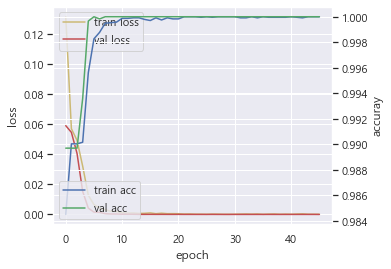

In [23]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['recall'], 'b', label='train acc')
acc_ax.plot(history.history['val_recall'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [24]:
model.evaluate(X_val, Y_val)

186/186 [==============================] - 0s 1ms/step - loss: 2.5050e-06 - recall: 1.0000


[2.505029442545492e-06, 1.0]

In [25]:
model.evaluate(X_test, y_test)

232/232 [==============================] - 0s 1ms/step - loss: 4.5719e-06 - recall: 1.0000


[4.571949830278754e-06, 1.0]

### Validation 데이터 혼동표

<AxesSubplot:>

Text(0.5, 46.5, 'Predicted Label')

Text(46.5, 0.5, 'True Label')

Text(0.5, 1.0, 'Confusion Matrix')

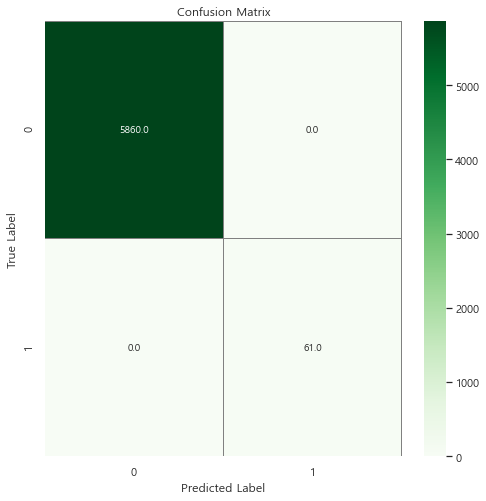

In [26]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Test 데이터 혼동표

<AxesSubplot:>

Text(0.5, 46.5, 'Predicted Label')

Text(46.5, 0.5, 'True Label')

Text(0.5, 1.0, 'Confusion Matrix')

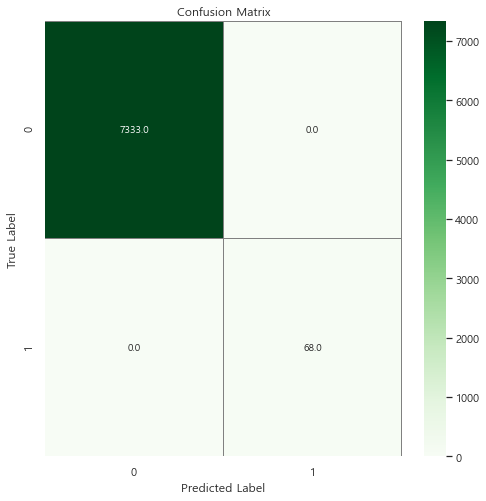

In [27]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [214]:
# generator썼을땐 predict 아닌 predict_generator사용

output = model.predict(X_val, steps=5)
#print(test_generator.class_indices)    # 각 클래스 이름을 알 수 있음
output

array([[0.9994593859, 0.0004166365],
       [0.9996993542, 0.0001841784],
       [0.9994773865, 0.0003763139],
       ...,
       [0.9996519089, 0.0002083182],
       [0.9997533560, 0.0001538992],
       [0.9995551705, 0.0002779663]], dtype=float32)

In [215]:
# 각 이미지 마다의 결과 출력 필요시. argmax이용
np.argmax(output, axis=1)
# numpy의 수치형 포맷을 소숫점 3째 자리까지 나타내는 옵션
np.set_printoptions(formatter={'float': lambda x: "{0:0.10f}".format(x)})
output
Y_val

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

array([[0.9994593859, 0.0004166365],
       [0.9996993542, 0.0001841784],
       [0.9994773865, 0.0003763139],
       ...,
       [0.9996519089, 0.0002083182],
       [0.9997533560, 0.0001538992],
       [0.9995551705, 0.0002779663]], dtype=float32)

array([[1.0000000000, 0.0000000000],
       [1.0000000000, 0.0000000000],
       [1.0000000000, 0.0000000000],
       ...,
       [1.0000000000, 0.0000000000],
       [1.0000000000, 0.0000000000],
       [1.0000000000, 0.0000000000]], dtype=float32)

### performance metrics

(array([7336.0000000000, 0.0000000000, 0.0000000000, 0.0000000000,
        0.0000000000, 0.0000000000, 0.0000000000, 0.0000000000,
        0.0000000000, 65.0000000000]),
 array([0.0000506101, 0.0998827294, 0.1997148544, 0.2995469868,
        0.3993791044, 0.4992112219, 0.5990433693, 0.6988754869,
        0.7987076044, 0.8985397220, 0.9983718395], dtype=float32),
 <BarContainer object of 10 artists>)

(array([65.0000000000, 0.0000000000, 0.0000000000, 0.0000000000,
        0.0000000000, 0.0000000000, 0.0000000000, 0.0000000000,
        0.0000000000, 7336.0000000000]),
 array([0.0018707514, 0.1016767099, 0.2014826685, 0.3012886345,
        0.4010945857, 0.5009005070, 0.6007065177, 0.7005124688,
        0.8003184199, 0.9001243711, 0.9999303222], dtype=float32),
 <BarContainer object of 10 artists>)

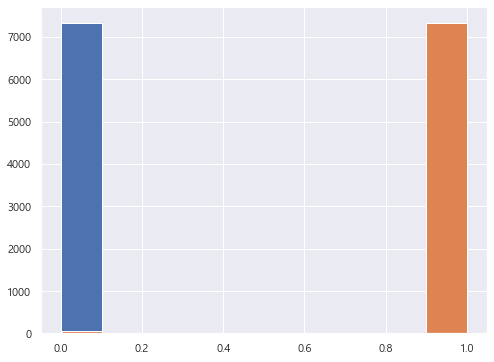

In [219]:
plt.hist(output[:, 1])
plt.hist(output[:, 0])

In [240]:
data['판정결과'] = df['판정결과']
data['판정결과'].shape

(37002,)

In [242]:
data['판정결과'] = df['판정결과']
X_train, X_val, Y_train, Y_val = train_test_split(np.load('../../data/image_matrix.npy'), data['판정결과'], test_size = 0.2, random_state=2)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

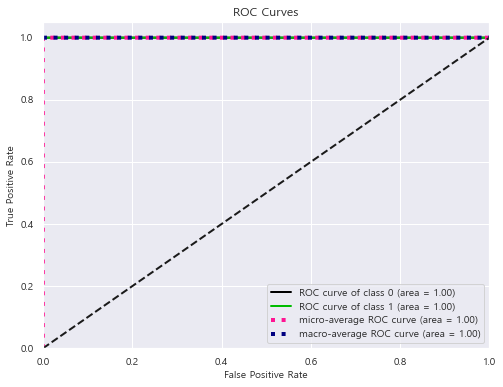

In [243]:
import scikitplot as skplt
skplt.metrics.plot_roc(Y_val, output)

# B. Machine learning

In [15]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, plot_roc_curve, plot_confusion_matrix, classification_report

from sklearn.pipeline import Pipeline, make_pipeline

In [19]:
X_train, X_test, y_train, y_test=train_test_split(data.drop('판정결과', axis=1),
                                                  data['판정결과'], 
                                                  test_size=0.2, 
                                                  stratify= data['판정결과'], random_state=11)

DecisionTreeClassifier(random_state=11)

No handles with labels found to put in legend.


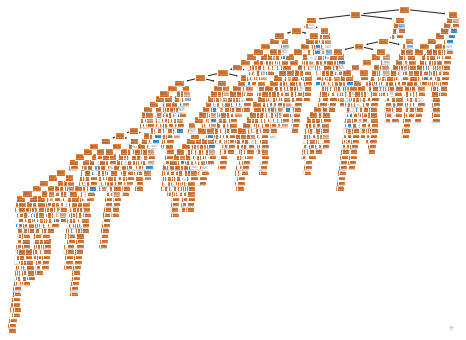

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(random_state=11)
dt.fit(data.drop('판정결과', axis=1), data['판정결과'])

ax = plot_tree(dt, filled=True)
plt.legend(loc='lower right', borderpad=0, handletextpad=0)

<BarContainer object of 205 artists>

[Text(0, 0, '가당'),
 Text(1, 0, '가미'),
 Text(2, 0, '가수'),
 Text(3, 0, '가수분해'),
 Text(4, 0, '가압'),
 Text(5, 0, '가압+탈수+원심분리'),
 Text(6, 0, '가열'),
 Text(7, 0, '가열+성형'),
 Text(8, 0, '가염'),
 Text(9, 0, '건조'),
 Text(10, 0, '결정화'),
 Text(11, 0, '경화'),
 Text(12, 0, '계량,측정,무게달기'),
 Text(13, 0, '고기분류'),
 Text(14, 0, '공병및공캔준비'),
 Text(15, 0, '교반'),
 Text(16, 0, '굽기'),
 Text(17, 0, '권체'),
 Text(18, 0, '균질'),
 Text(19, 0, '금속검출검사또는금속검출'),
 Text(20, 0, '기타'),
 Text(21, 0, '껍질벗기기'),
 Text(22, 0, '껍질제거'),
 Text(23, 0, '끝손질'),
 Text(24, 0, '냉각'),
 Text(25, 0, '냉동'),
 Text(26, 0, '냉장'),
 Text(27, 0, '농축'),
 Text(28, 0, '담금'),
 Text(29, 0, '당화'),
 Text(30, 0, '동결'),
 Text(31, 0, '롤링'),
 Text(32, 0, '머리자르기'),
 Text(33, 0, '멸균'),
 Text(34, 0, '묶음'),
 Text(35, 0, '묻힘'),
 Text(36, 0, '밀봉'),
 Text(37, 0, '반응'),
 Text(38, 0, '발효'),
 Text(39, 0, '배수'),
 Text(40, 0, '배양'),
 Text(41, 0, '볶기'),
 Text(42, 0, '분리'),
 Text(43, 0, '분말'),
 Text(44, 0, '분무'),
 Text(45, 0, '분쇄'),
 Text(46, 0, '분해'),
 Text(47, 0, '불활성화'),


Text(0, 0.5, 'Features Importance')

Text(0.5, 1.0, 'feature_importances')

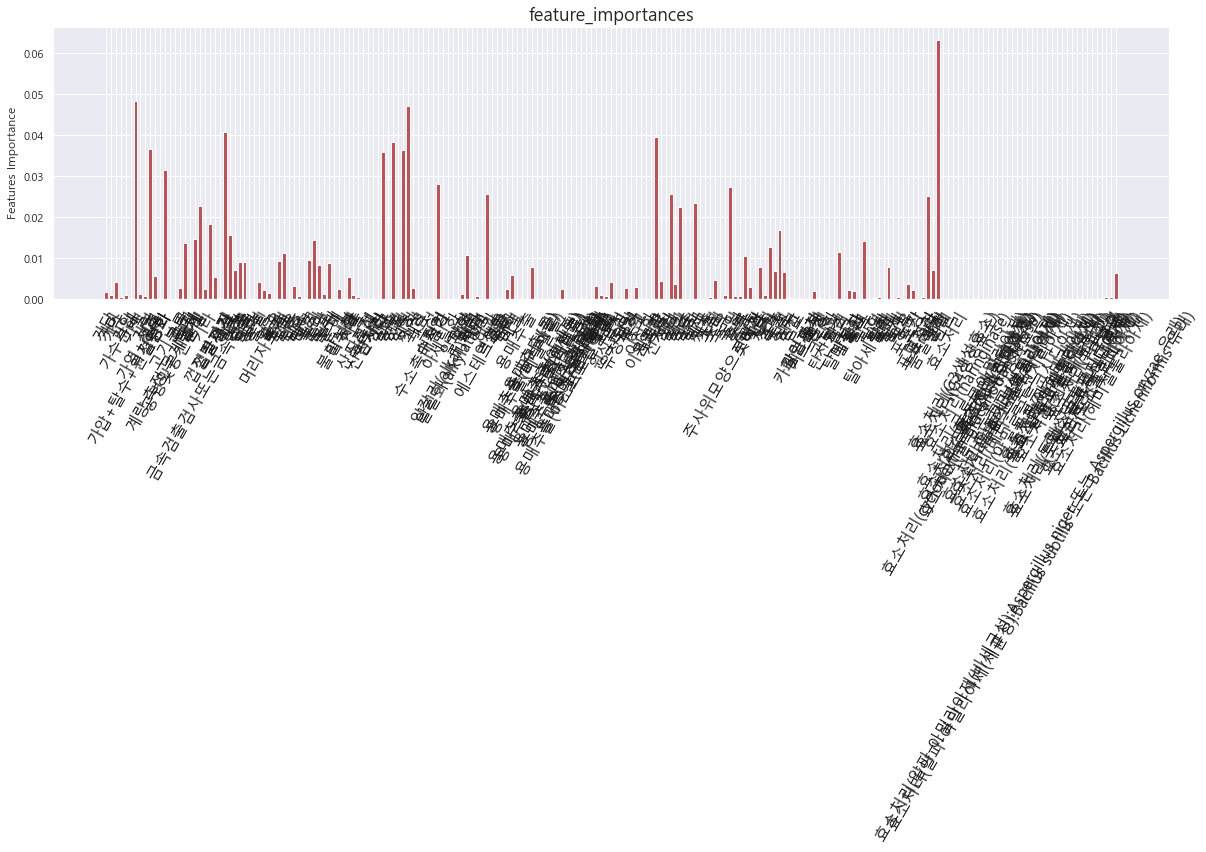

In [24]:
X = data.drop('판정결과', axis=1)
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(range(X.shape[1]), dt.feature_importances_, color='r')
ax.set_xticks(np.arange(X.shape[1]))
ax.set_xticklabels(X.columns, rotation='60', color="k", size=16)
ax.set_ylabel('Features Importance')
ax.set_title('feature_importances', fontsize=18)

### 1. Decision tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
params = {
    'criterion' :['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth' : np.arange(1,15),
    'min_samples_split': np.arange(0.005, 0.1, 0.001),
    'min_samples_leaf': [0.005, 0.01, 0.05, 0.10], # np.arange(0.005, 0.1, 0.001)
    'max_features': ['auto', 'sqrt', 'log2'],
}

np.random.seed(1111)
kf = KFold(n_splits=2)
model = DecisionTreeClassifier(random_state=11)
grid = RandomizedSearchCV(model, params, cv=kf, n_iter=50, 
                          scoring = 'recall_macro', verbose =True)
grid.fit(X_train, y_train)
print(f'optimal parameter: {grid.best_params_}')

Fitting 2 folds for each of 50 candidates, totalling 100 fits


RandomizedSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(random_state=11), n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [0.005, 0.01, 0.05,
                                                             0.1],
                                        'min_samples_split': array([0.005,...
       0.05 , 0.051, 0.052, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058,
       0.059, 0.06 , 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067,
       0.068, 0.069, 0.07 , 0.071, 0.072, 0.073, 0.074, 0.075, 0.076,
       0.077, 0.078, 0.079, 0.08 , 0.081, 0.082, 0.083, 0.084, 0.085,
       0.086, 0.087, 0.088, 0.089, 0.09 , 0.091, 0.092, 0.093, 0.094,
       0.095, 0.096, 0.097, 0.098, 0.099]),
                                        'splitter': ['best', 'random']},
                   scoring='recall_macro', verbose=True)

optimal parameter: {'splitter': 'best', 'min_samples_split': 0.07700000000000001, 'min_samples_leaf': 0.05, 'max_features': 'auto', 'max_depth': 13, 'criterion': 'entropy'}


In [26]:
y_predict = grid.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7328
           1       0.00      0.00      0.00        73

    accuracy                           0.99      7401
   macro avg       0.50      0.50      0.50      7401
weighted avg       0.98      0.99      0.99      7401



In [27]:
from sklearn import ensemble 
stump= DecisionTreeClassifier(max_depth=1, random_state=1357)
bag = ensemble.BaggingClassifier(stump, n_estimators = 500, max_samples =0.8)
y_predict = bag.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_predict)
print(classification_report(y_test, y_predict))

0.9901364680448588

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7328
           1       0.00      0.00      0.00        73

    accuracy                           0.99      7401
   macro avg       0.50      0.50      0.50      7401
weighted avg       0.98      0.99      0.99      7401



### 2 . Bagging

In [29]:
dt = DecisionTreeClassifier(random_state=11)
bag = ensemble.BaggingClassifier(dt, n_estimators = 30, max_samples =0.8)
y_predict = bag.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_predict)
print(classification_report(y_test, y_predict))

0.9901364680448588

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7328
           1       0.50      0.11      0.18        73

    accuracy                           0.99      7401
   macro avg       0.75      0.55      0.59      7401
weighted avg       0.99      0.99      0.99      7401



In [32]:
dt = DecisionTreeClassifier(random_state=11)
bag = ensemble.BaggingClassifier(dt, n_estimators = 100, max_samples =0.8)
y_predict = bag.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_predict)
print(classification_report(y_test, y_predict))

y_proba = bag.predict_proba(X_test)
print(f'AUROC: {roc_auc_score(y_test, y_proba[:, 1])}')
print(f'AP: {average_precision_score(y_test, y_proba[:, 1])}')

0.9902715849209567

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7328
           1       0.53      0.14      0.22        73

    accuracy                           0.99      7401
   macro avg       0.76      0.57      0.61      7401
weighted avg       0.99      0.99      0.99      7401



In [35]:
dt = DecisionTreeClassifier(random_state=11)
bag = ensemble.BaggingClassifier(dt, n_estimators = 300, max_samples =0.8)
y_predict = bag.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_predict)
print(classification_report(y_test, y_predict))

0.990001351168761

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7328
           1       0.47      0.12      0.20        73

    accuracy                           0.99      7401
   macro avg       0.73      0.56      0.60      7401
weighted avg       0.99      0.99      0.99      7401



### 3. Random Forest

In [31]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 20, 10)]
min_samples_split = np.arange(2, 30, 2)
min_samples_leaf = np.arange(2, 50, 2)
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

from sklearn.metrics import roc_auc_score, average_precision_score
np.random.seed(4321)
rf = ensemble.RandomForestClassifier(random_state=11)
rf_random = RandomizedSearchCV(rf, random_grid, cv=kf, scoring = 'recall')
y_predict = rf_random.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict))
y_proba = rf_random.predict_proba(X_test)
print(f'정확도(accuracy): {accuracy_score(y_test, y_predict)}')
print(f'AUROC: {roc_auc_score(y_test, y_proba[:, 1])}')
print(f'AP: {average_precision_score(y_test, y_proba[:, 1])}')

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7328
           1       0.00      0.00      0.00        73

    accuracy                           0.99      7401
   macro avg       0.50      0.50      0.50      7401
weighted avg       0.98      0.99      0.99      7401

정확도(accuracy): 0.9901364680448588
AUROC: 0.6689092690075971
AP: 0.01872647741182517


### 4. Extremely Randomized Trees

In [34]:
extree = ensemble.ExtraTreesClassifier(random_state=0)
y_predict = extree.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict))
y_proba = rf_random.predict_proba(X_test)
print(f'정확도(accuracy): {accuracy_score(y_test, y_predict)}')
print(f'AUROC: {roc_auc_score(y_test, y_proba[:, 1])}')
print(f'AP: {average_precision_score(y_test, y_proba[:, 1])}')

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7328
           1       0.50      0.12      0.20        73

    accuracy                           0.99      7401
   macro avg       0.75      0.56      0.60      7401
weighted avg       0.99      0.99      0.99      7401

정확도(accuracy): 0.9901364680448588
AUROC: 0.6689092690075971
AP: 0.01872647741182517


### 5. VotingClassifier

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

estimators=[('lgr', LogisticRegression(solver='saga', class_weight='balanced')),
            ('rf',  ensemble.RandomForestClassifier(class_weight='balanced')),
            ('gnb', GaussianNB())]
            
eclf = ensemble.VotingClassifier(estimators, voting='soft')

params = {
    'lgr__C': [0.01, 0.1, 1, 10], 'lgr__penalty': ['l1', 'l2'], 
    'rf__n_estimators': [200], 'rf__max_features': ['auto', 'sqrt', 'log2'],
    'rf__max_depth' : [3, 4, 5, 6, 7, 8], 'rf__criterion' :['gini', 'entropy'],
    'gnb__var_smoothing': [1e-9, 1e-8,1e-7, 1e-6, 1e-5]
}

kf = KFold(n_splits=5)
grid = RandomizedSearchCV(eclf, params, cv = kf,  verbose = 1, n_iter = 5,
                          scoring = 'f1_macro')           
      
y_predict = grid.fit(X_train, y_train).predict(X_test)
y_proba = grid.predict_proba(X_test)
print(f'AUROC: {roc_auc_score(y_test, y_proba[:, 1])}')
print(f'AP: {average_precision_score(y_test, y_proba[:, 1])}')
print(classification_report(y_test, y_predict))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
AUROC: 0.6176076374349464
AP: 0.023641038281785584
              precision    recall  f1-score   support

           0       1.00      0.23      0.37      7328
           1       0.01      0.93      0.02        73

    accuracy                           0.24      7401
   macro avg       0.50      0.58      0.20      7401
weighted avg       0.99      0.24      0.37      7401



### 6. StackingClassifier

In [38]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import make_pipeline 

In [ ]:
estimators = [
    ('bag', ensemble.BaggingClassifier(dt, n_estimators = 100, max_samples =0.8)),
    ('rf',  RandomForestClassifier(n_estimators=100, random_state=5)),
    ('gnb', grid)
]

meta = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()) 

y_predict = meta.fit(X_train, y_train).predict(X_test)

In [43]:
y_proba = meta.predict_proba(X_test)
print(f'AUROC: {roc_auc_score(y_test, y_proba[:, 1])}')
print(f'AP: {average_precision_score(y_test, y_proba[:, 1])}')
print(classification_report(y_test, y_predict))

AUROC: 0.7679916028593647
AP: 0.13150160110446715
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7328
           1       0.00      0.00      0.00        73

    accuracy                           0.99      7401
   macro avg       0.50      0.50      0.50      7401
weighted avg       0.98      0.99      0.99      7401



### 7. Catboost Classifier

In [47]:
from catboost import CatBoostClassifier
seed =1234
params = {'loss_function':'Logloss', 'eval_metric':'Recall', 
          'verbose': 200, 'random_seed': seed}
          
cbc_1 = CatBoostClassifier(**params)

cbc_1.fit(X_train, y_train, 
          eval_set=(X_test, y_test), 
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.073168
0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 23.8ms	remaining: 23.8s
200:	learn: 0.0273973	test: 0.0000000	best: 0.0000000 (0)	total: 4.33s	remaining: 17.2s
400:	learn: 0.0787671	test: 0.0136986	best: 0.0136986 (327)	total: 9.39s	remaining: 14s
600:	learn: 0.1335616	test: 0.0136986	best: 0.0136986 (327)	total: 14.1s	remaining: 9.36s
800:	learn: 0.1575342	test: 0.0136986	best: 0.0136986 (327)	total: 18.6s	remaining: 4.62s
999:	learn: 0.1815068	test: 0.0410959	best: 0.0410959 (869)	total: 23.5s	remaining: 0us

bestTest = 0.04109589041
bestIteration = 869

Shrink model to first 870 iterations.


In [50]:
y_predict = cbc_1.predict(X_test)

y_proba = cbc_1.predict_proba(X_test)
print(f'AUROC: {roc_auc_score(y_test, y_proba[:, 1])}')
print(f'AP: {average_precision_score(y_test, y_proba[:, 1])}')
print(classification_report(y_test, y_predict))

AUROC: 0.7541583791948315
AP: 0.09733718631699742
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7328
           1       0.43      0.04      0.07        73

    accuracy                           0.99      7401
   macro avg       0.71      0.52      0.53      7401
weighted avg       0.98      0.99      0.99      7401



### 8.  Ensemble of samplers
- Classifier including inner balancing samplers

In [55]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier

bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0) 
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
rusboost = RUSBoostClassifier(n_estimators=200, algorithm='SAMME.R',
                              random_state=0)

y = data['판정결과']
for classifier in [bag, rusboost] :
    
    cross_val_score(classifier, X, y, scoring='recall_macro', cv=kf)
    classifier.fit(X_train, y_train)
    y_predict = classifier.predict(X_test)
    y_proba = classifier.predict_proba(X_test)
    print(f'AUROC: {roc_auc_score(y_test, y_proba[:, 1])}')
    print(f'AP: {average_precision_score(y_test, y_proba[:, 1])}')
    print(classification_report(y_test, y_predict))
    print('\n')

array([0.53642715, 0.55666657, 0.5229236 , 0.52467674, 0.52929294])

BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

AUROC: 0.6572987079021355
AP: 0.11940758257520417
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7328
           1       0.45      0.12      0.19        73

    accuracy                           0.99      7401
   macro avg       0.72      0.56      0.59      7401
weighted avg       0.99      0.99      0.99      7401





array([0.6188647 , 0.66360906, 0.58444263, 0.58662265, 0.58193709])

RUSBoostClassifier(n_estimators=200, random_state=0)

AUROC: 0.6800590342166657
AP: 0.024392555451440277
              precision    recall  f1-score   support

           0       0.99      0.61      0.75      7328
           1       0.02      0.66      0.03        73

    accuracy                           0.61      7401
   macro avg       0.51      0.63      0.39      7401
weighted avg       0.98      0.61      0.75      7401





In [12]:
data.to_excel('../../data/image.xlsx')

# 수입민원신고 전처리

In [69]:
df = df.set_index('접수번호')
df

해외제조업소명                해외제조업소 지역  \
접수번호                                                                        
20160085048                         MICHEL LYNCH       NOUVELLE-AQUITAINE   
20160081852   QINGDAO LONG YUAN FA FOODS CO.,LTD                 SHANDONG   
20160087342                 HARIBO GMBH & CO. KG      NORDRHEIN-WESTFALEN   
20160085242           YUNNAN LANDSUN TEA CO.,LTD                   YUNNAN   
20160086246             MUSASHINO FOODS CO.,LTD.                  FUKUOKA   
...                                          ...                      ...   
202000535510                     CHARLES NOELLAT  BOURGOGNE-FRANCHE-COMTE   
202000706307                    H.&J. BRUGGEN KG       SCHLESWIG-HOLSTEIN   
202000627624            NOUSHIG INC DBA AMORETTI               CALIFORNIA   
202000374022                    DIRICOM SA DE CV         CIUDAD DE MEXICO   
202000444415        GRANDS VINS DE GIRONDE - GVG       NOUVELLE-AQUITAINE   

                              품목코드      품목명  판정결과 진균수시험대상 주문자상표부착  \
접수번호                                                                
20160085048   C0127050000000000000      과실주     0       N     아니오   
20160081852   C0102030000000000000      만두류     0       N     아니오   
20160087342   C0101020000004000000  캔디류(젤리)     0       N     아니오   
20160085242   C0116010000000000000      침출차     0       N     아니오   
20160086246   C0115010000000000000       국수     0       N     아니오   
...                            ...      ...   ...     ...     ...   
202000535510  C0314180000000000000      과실주     0       N     아니오   
202000706307  C0315070200000000000    곡류가공품     0       N       예   
202000627624  C0304070000000000000    당류가공품     0       N     아니오   
202000374022  C0307030300000000000      향미유     0       N     아니오   
202000444415  C0314180000000000000      과실주     0       N     아니오   

                                           제품명(한글) 제조국(원산지)  \
접수번호                                                          
20160085048                  미쉘 린치 보르도 멜로 까베르네 소비뇽      프랑스   
20160081852                                    사색교       중국   
20160087342                                하리보스타믹스       독일   
20160085242                                    보이차       중국   
20160086246                                 냉동유대우동       일본   
...                                            ...      ...   
202000535510  샤를 노엘라 뉘 생 조르쥬 프리미에 크뤼 클로 데 코르베 2016      프랑스   
202000706307                         홀 그레인 오트 그래놀라       독일   
202000627624                        피나콜라다시럽(750ml)       미국   
202000374022                           아보카도오일 (마늘)      멕시코   
202000444415                            샤또 베사드 보르도      프랑스   

                              접수일  ... 효소처리(트랜스글루타미나아제) 효소처리(트립신) 효소처리(파파인)  \
접수번호                               ...                                        
20160085048   2016-02-18 09:21:09  ...              0.0       0.0       0.0   
20160081852   2016-02-16 09:40:21  ...              0.0       0.0       0.0   
20160087342   2016-02-19 13:15:39  ...              0.0       0.0       0.0   
20160085242   2016-02-18 09:47:30  ...              0.0       0.0       0.0   
20160086246   2016-02-18 16:45:13  ...              0.0       0.0       0.0   
...                           ...  ...              ...       ...       ...   
202000535510  2020-09-28 11:12:35  ...              0.0       0.0       0.0   
202000706307  2020-12-15 11:01:56  ...              0.0       0.0       0.0   
202000627624  2020-11-10 11:12:41  ...              0.0       0.0       0.0   
202000374022  2020-07-14 09:49:11  ...              0.0       0.0       0.0   
202000444415  2020-08-18 10:02:54  ...              0.0       0.0       0.0   

             효소처리(펙티나아제) 효소처리(포스포리파아제) 효소처리(프로테아제) 효소처리(헤미셀룰라아제)  후발효   훈연  \
접수번호                                                                         
20160085048          0.0           0.0         0.0           0.0  0.0  0.0   
20160081852          0.0           0.0         0.0         

In [70]:
df['판정결과'].value_counts(normalize=True)

0    0.990136
1    0.009864
Name: 판정결과, dtype: float64

# 1. 데이터 전처리
- 데이터전처리와 교차검증 분리
- SMOTE()적용을 위해 모든 특성변수는 수치화

In [71]:
df.columns

Index(['해외제조업소명', '해외제조업소 지역', '품목코드', '품목명', '판정결과', '진균수시험대상', '주문자상표부착',
       '제품명(한글)', '제조국(원산지)', '접수일',
       ...
       '효소처리(트랜스글루타미나아제)', '효소처리(트립신)', '효소처리(파파인)', '효소처리(펙티나아제)',
       '효소처리(포스포리파아제)', '효소처리(프로테아제)', '효소처리(헤미셀룰라아제)', '후발효', '훈연', '희석'],
      dtype='object', length=233)

In [72]:
df['접수일자'] = pd.to_datetime(df['접수일'])
df['접수일자'].max()
df['접수일자'].min()

Timestamp('2020-12-30 12:23:02')

Timestamp('2015-12-10 09:29:56')

In [73]:
'''
df['선적일'].astype(str).str.extract(r'^(\d{4})', expand=False)
df['선적일'].astype(str).str.extract(r'-(\d{1,2})-', expand=False)
df['선적일'].astype(str).str.extract(r'^.*-(\d{1,2})', expand=False)
'''

"\ndf['선적일'].astype(str).str.extract(r'^(\\d{4})', expand=False)\ndf['선적일'].astype(str).str.extract(r'-(\\d{1,2})-', expand=False)\ndf['선적일'].astype(str).str.extract(r'^.*-(\\d{1,2})', expand=False)\n"

In [74]:
df['선적일'].str.split().str[0]
df['선적일'].str.split().str[0][:1].str.split('-')

접수번호
20160085048     2016-01-06
20160081852     2016-02-03
20160087342     2015-12-16
20160085242     2016-02-06
20160086246     2016-02-11
                   ...    
202000535510    2020-08-12
202000706307    2020-10-05
202000627624    2020-06-27
202000374022    2020-06-06
202000444415    2020-07-06
Name: 선적일, Length: 37002, dtype: object

접수번호
20160085048    [2016, 01, 06]
Name: 선적일, dtype: object

In [75]:
def to_per(x):
    splitted = x.split('-')
    return pd.Period(year=int(splitted[0]), 
                     month=int(splitted[1]), 
                     day=int(splitted[2]), freq='D')

df['접수일'] = df['접수일'].str.split().str[0].apply(to_per)
df['선적일'] = df['선적일'].str.split().str[0].apply(to_per)
df['입항일'] = df['입항일'].str.split().str[0].apply(to_per)
df['반입일자'] = df['반입일자'].str.split().str[0].apply(to_per)

In [76]:
cols = ['선적일', '입항일', '접수일', '반입일자', '판정결과']
df[df['선적일'] > df['입항일']][cols]['판정결과'].value_counts(normalize=True)
df[df['입항일'] > df['반입일자']][cols]['판정결과'].value_counts(normalize=True)
df[df['접수일'] < df['반입일자']][cols]['판정결과'].value_counts(normalize=True)
df['판정결과'].value_counts(normalize=True)
df[cols]

0    0.984496
1    0.015504
Name: 판정결과, dtype: float64

0    0.984848
1    0.015152
Name: 판정결과, dtype: float64

0    0.969697
1    0.030303
Name: 판정결과, dtype: float64

0    0.990136
1    0.009864
Name: 판정결과, dtype: float64

선적일         입항일         접수일        반입일자  판정결과
접수번호                                                              
20160085048   2016-01-06  2016-02-07  2016-02-18  2016-02-12     0
20160081852   2016-02-03  2016-02-05  2016-02-16  2016-02-11     0
20160087342   2015-12-16  2016-01-27  2016-02-19  2016-01-28     0
20160085242   2016-02-06  2016-02-15  2016-02-18  2016-02-16     0
20160086246   2016-02-11  2016-02-11  2016-02-18  2016-02-12     0
...                  ...         ...         ...         ...   ...
202000535510  2020-08-12  2020-09-18  2020-09-28  2020-09-22     0
202000706307  2020-10-05  2020-11-16  2020-12-15  2020-11-20     0
202000627624  2020-06-27  2020-07-14  2020-11-10  2020-07-15     0
202000374022  2020-06-06  2020-06-26  2020-07-14  2020-06-30     0
202000444415  2020-07-06  2020-08-07  2020-08-18  2020-08-12     0

[37002 rows x 5 columns]

In [77]:
#df['입항일'].dt.day
df['입항_선적일'] = (df['입항일']- df['선적일'])
df['입항_선적일'] = df['입항_선적일'].apply(lambda x : str(x).split('*')[0].split('<')[1].strip())
df['입항_선적일'] = df['입항_선적일'].replace('Day>', '1')
df['입항_선적일'] = df['입항_선적일'].astype('float')

In [78]:
df.loc[df['입항_선적일'] < 0, '입항_선적일'] = 0

In [79]:
df['입항_선적일'].value_counts()

1.0      5595
2.0      3327
3.0      3097
4.0      2581
5.0      1331
         ... 
98.0        1
395.0       1
81.0        1
184.0       1
752.0       1
Name: 입항_선적일, Length: 184, dtype: int64

In [80]:
summary(df)

데이터형태(dtypes)  결측치 수(null)  결측치 비율(%)  고유값 수(nunique)  \
해외제조업소명            object            0        0.0           10846   
해외제조업소 지역          object            0        0.0             920   
품목코드               object            0        0.0             366   
품목명                object            0        0.0             268   
판정결과                int64            0        0.0               2   
...                   ...          ...        ...             ...   
후발효               float64            0        0.0               2   
훈연                float64            0        0.0               2   
희석                float64            0        0.0               2   
접수일자       datetime64[ns]            0        0.0           36767   
입항_선적일            float64            0        0.0             184   

                                             자료 내용(contents)  nan 비율  
해외제조업소명    ['MICHEL LYNCH' 'QINGDAO LONG YUAN FA FOODS CO...     0.0  
해외제조업소 지역  ['NOUVELLE-AQUITAINE' 'SHANDONG' 'NORDRHEIN-WE...     0.0  
품목코드       ['C0127050000000000000' 'C0102030000000000000'...     0.0  
품목명                       ['과실주' '만두류' '캔디류(젤리)' '침출차' '국수']     0.0  
판정결과                                                   [0 1]     0.0  
...                                                      ...     ...  
후발효                                                  [0. 1.]     0.0  
훈연                                                   [0. 1.]     0.0  
희석                                                   [0. 1.]     0.0  
접수일자       ['2016-02-18T09:21:09.000000000' '2016-02-16T0...     0.0  
입항_선적일                                 [32.  2. 42.  9.  0.]     0.0  

[235 rows x 6 columns]

## Data Visualization

<AxesSubplot:>

Text(0.5, 1.0, '가공식품 제품유형별 수입신고 빈도(상위 50개 유형)')

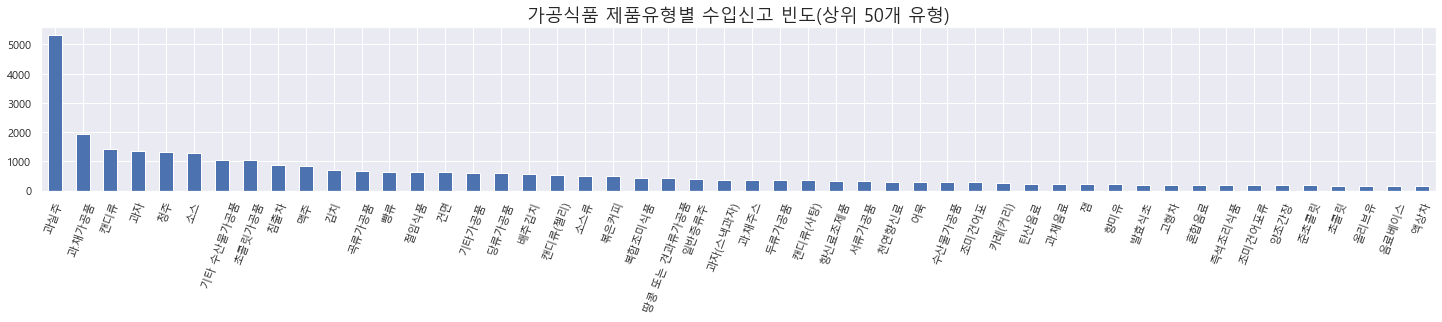

<AxesSubplot:>

Text(0.5, 1.0, '가공식품 제조국(원산지)별 수입신고 빈도(상위 50개국)')

HARIBO GMBH & CO. KG                        314
WAKAME FOOD CORPORATION                     206
OTAFUKU SAUCE CO., LTD.                     201
S&B GARLIC FOODS CO.,LTD. TAKADA FACTORY    147
ROYCE' CONFECT CO.,LTD.                     101
GALLANT OCEAN (VIETNAM) .,JSC                84
QINGDAO YONGFANGYUAN FOOD CO.,LTD.           77
ARIAKEJAPAN CO.,LTD.                         75
TROLLI GMBH                                  73
KCC COMPANY,LIMITED                          73
DONG AN CO., LTD.                            65
ASAHI BREWERIES, LTD. HAKATA BREWERY         64
KASUGAI SEIKA.                               64
MARUKOME CO.LTD.                             64
QINGDAO HAIAOTE FOODS CO.,LTD.               63
S&B FOODS INC. UEDA FACTORY                  62
MIZKAN CO., LTD. TOCHIGI PLANT               62
POLARIS PINEAPPLE CANNERY                    61
BACHA COFFEE PTE LTD                         60
CHUUGAI FOODS CORP.                          59
Name: 해외제조업소명, dtype: int64

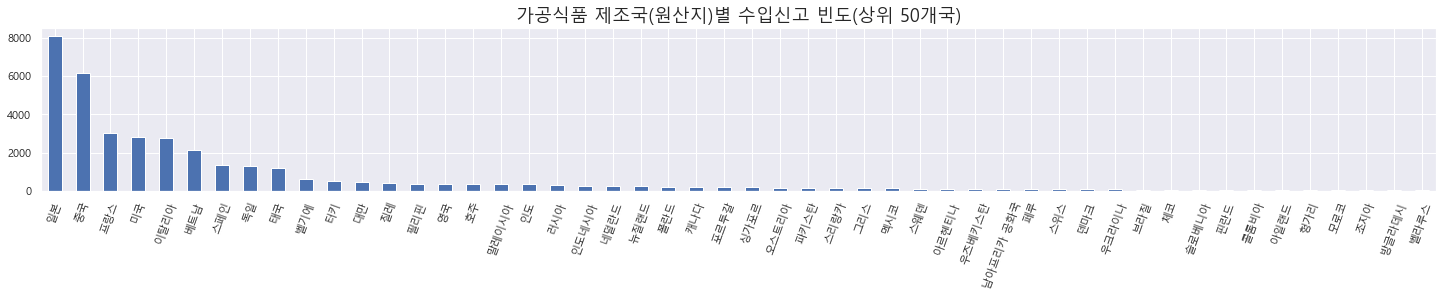

In [81]:
df.품목명.value_counts().nlargest(50).plot(kind='bar', figsize=(25, 3), rot=70)
plt.title('가공식품 제품유형별 수입신고 빈도(상위 50개 유형)', fontsize=18); plt.show()
df['제조국(원산지)'].value_counts().nlargest(50).plot(kind='bar', figsize=(25, 3), rot=70)
plt.title('가공식품 제조국(원산지)별 수입신고 빈도(상위 50개국)', fontsize=18)
df['해외제조업소명'].value_counts().nlargest(20)

# <font color='red'> 요기 요기 요기 

In [83]:
df.to_pickle('../../data/paper.pkl')
df = pd.read_pickle('../../data/paper.pkl')

df = df.drop(columns=['선적일', '입항일', '접수일', '반입일자'])

## 실수형 변수
### 실수형 변수의 표준화(dynamic time warping을 적용하기 위해 minmax로 모든 변수를 0 ~ 1로 표준화)

In [84]:
numeric_features = ['순중량(Kg)', '과세가격($/Kg)', '과세가격', '입항_선적일']

for col in numeric_features:
    df[col] = np.log(1 + df[col])
    
from sklearn.preprocessing import StandardScaler, MinMaxScaler
encoder = MinMaxScaler()
encoder.fit(df[numeric_features], df['판정결과'])
df[numeric_features] = encoder.transform(df[numeric_features])
#df[numeric_features].mean(); df[numeric_features].std()
df[numeric_features].min(); df[numeric_features].max()

MinMaxScaler()

순중량(Kg)       0.0
과세가격($/Kg)    0.0
과세가격          0.0
입항_선적일        0.0
dtype: float64

순중량(Kg)       1.0
과세가격($/Kg)    1.0
과세가격          1.0
입항_선적일        1.0
dtype: float64

array([[<AxesSubplot:title={'center':'순중량(Kg)'}>,
        <AxesSubplot:title={'center':'과세가격($/Kg)'}>],
       [<AxesSubplot:title={'center':'과세가격'}>,
        <AxesSubplot:title={'center':'입항_선적일'}>]], dtype=object)

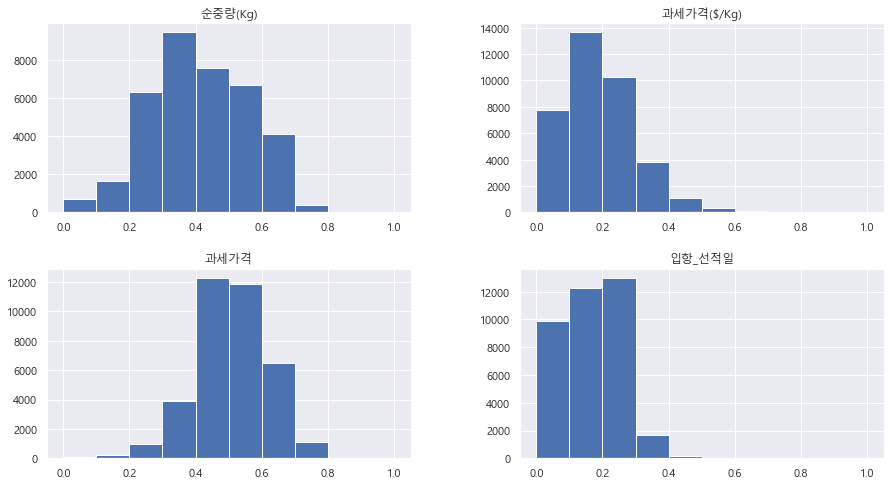

In [85]:
plt.rcParams['figure.figsize'] = [15,8]
df[numeric_features].hist()

## 범주형 변수
### Target mean

In [86]:
categorical_features = ['해외제조업소명', '해외제조업소 지역', '품목명', '제품명(한글)',
                        '제조국(원산지)', '수입화주 상호', '선적항명', '대행업자 사업자등록번호']

In [87]:
import category_encoders as ce
encoder = ce.target_encoder.TargetEncoder(cols= categorical_features)
encoder.fit(df[categorical_features], df['판정결과'])
df[categorical_features] = encoder.transform(df[categorical_features])
df.head()
df.shape

TargetEncoder(cols=['해외제조업소명', '해외제조업소 지역', '품목명', '제품명(한글)', '제조국(원산지)',
                    '수입화주 상호', '선적항명', '대행업자 사업자등록번호'])

해외제조업소명  해외제조업소 지역                  품목코드       품목명  판정결과  \
접수번호                                                                     
20160085048  0.002653   0.000000  C0127050000000000000  0.001129     0   
20160081852  0.001176   0.007856  C0102030000000000000  0.022222     0   
20160087342  0.000000   0.000000  C0101020000004000000  0.000000     0   
20160085242  0.002653   0.000000  C0116010000000000000  0.010405     0   
20160086246  0.002653   0.000000  C0115010000000000000  0.007634     0   

            진균수시험대상 주문자상표부착   제품명(한글)  제조국(원산지) 유전자변형식품  ... 효소처리(파파인)  \
접수번호                                                     ...             
20160085048       N     아니오  0.009864  0.002993    해당없음  ...       0.0   
20160081852       N     아니오  0.009864  0.014464    해당없음  ...       0.0   
20160087342       N     아니오  0.000066  0.009238    해당없음  ...       0.0   
20160085242       N     아니오  0.000000  0.014464    해당없음  ...       0.0   
20160086246       N     아니오  0.002653  0.000370    해당없음  ...       0.0   

            효소처리(펙티나아제) 효소처리(포스포리파아제) 효소처리(프로테아제) 효소처리(헤미셀룰라아제)  후발효   훈연  \
접수번호                                                                        
20160085048         0.0           0.0         0.0           0.0  0.0  0.0   
20160081852         0.0           0.0         0.0           0.0  0.0  0.0   
20160087342         0.0           0.0         0.0           0.0  0.0  0.0   
20160085242         0.0           0.0         0.0           0.0  0.0  0.0   
20160086246         0.0           0.0         0.0           0.0  0.0  0.0   

              희석                접수일자    입항_선적일  
접수번호                                            
20160085048  0.0 2016-02-18 09:21:09  0.268932  
20160081852  0.0 2016-02-16 09:40:21  0.084499  
20160087342  0.0 2016-02-19 13:15:39  0.289291  
20160085242  0.0 2016-02-18 09:47:30  0.177102  
20160086246  0.0 2016-02-18 16:45:13  0.000000  

[5 rows x 231 columns]

(37002, 231)

### Target 수치화

In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_encoder = le.fit(df['판정결과'])
df['판정결과'] = label_encoder.transform(df['판정결과'])

# Step 1. 신속통관
## Unsupervised learning, Anomaly detection 

In [89]:
#cols = ['품목명', '판정결과', '진균수시험대상', '주문자상표부착', '제조국(원산지)', '유전자변형식품', '유기식품 여부', '용도명', '영유아섭취대상', 
#        '식품조사처리 여부', '순중량(Kg)', '방사선조사식품', '과세가격', '가온보존대상', '접수일자']

cols = ['품목명', '용도명', '제조국(원산지)', '유기식품 여부', '영유아섭취대상', '주문자상표부착', '유전자변형식품',
       '가온보존대상', '진균수시험대상', '방사선조사식품', '과세가격($/Kg)', '순중량(Kg)', '과세가격', '판정결과']

tf =df[cols].copy()
dummy_cats = tf.select_dtypes(include=['object', 'category']).columns
#tf = df.sample(frac=0.2)
X = pd.get_dummies(tf.drop(['판정결과'], axis=1), prefix=dummy_cats)
y = tf['판정결과']

In [90]:
df.shape

(37002, 231)

In [91]:
summary(X)

데이터형태(dtypes)  결측치 수(null)  결측치 비율(%)  고유값 수(nunique)  \
품목명                   float64            0        0.0             104   
제조국(원산지)              float64            0        0.0              64   
과세가격($/Kg)            float64            0        0.0           14527   
순중량(Kg)               float64            0        0.0            9274   
과세가격                  float64            0        0.0           20798   
용도명_반송품(국내기준규격)         uint8            0        0.0               2   
용도명_반송품(기타)             uint8            0        0.0               2   
용도명_외화획득용 원료            uint8            0        0.0               2   
용도명_자사제품제조용             uint8            0        0.0               2   
용도명_판매용                 uint8            0        0.0               2   
유기식품 여부_아니오             uint8            0        0.0               2   
유기식품 여부_예               uint8            0        0.0               2   
영유아섭취대상_아니오             uint8            0        0.0               2   
영유아섭취대상_예               uint8            0        0.0               2   
주문자상표부착_아니오             uint8            0        0.0               2   
주문자상표부착_예               uint8            0        0.0               2   
유전자변형식품_표시하지않음          uint8            0        0.0               2   
유전자변형식품_표시함             uint8            0        0.0               2   
유전자변형식품_해당없음            uint8            0        0.0               2   
가온보존대상_N                uint8            0        0.0               2   
가온보존대상_Y                uint8            0        0.0               2   
진균수시험대상_N               uint8            0        0.0               2   
진균수시험대상_Y               uint8            0        0.0               2   
방사선조사식품_N               uint8            0        0.0               2   
방사선조사식품_Y               uint8            0        0.0               2   

                                                   자료 내용(contents)  nan 비율  
품목명              [0.00112888 0.02222222 0.         0.01040462 0...     0.0  
제조국(원산지)         [0.00299302 0.01446449 0.00923788 0.00037005 0...     0.0  
과세가격($/Kg)       [0.1886201  0.16933039 0.18745272 0.31433575 0...     0.0  
순중량(Kg)          [0.32167892 0.48328495 0.38537239 0.35482433 0...     0.0  
과세가격             [0.42813346 0.5669782  0.4877448  0.54529263 0...     0.0  
용도명_반송품(국내기준규격)                                              [0 1]     0.0  
용도명_반송품(기타)                                                  [0 1]     0.0  
용도명_외화획득용 원료                                                 [0 1]     0.0  
용도명_자사제품제조용                                                  [0 1]     0.0  
용도명_판매용                                                      [1 0]     0.0  
유기식품 여부_아니오                                                  [1 0]     0.0  
유기식품 여부_예                                                    [0 1]     0.0  
영유아섭취대상_아니오                                                  [1 0]     0.0  
영유아섭취대상_예                                                    [0 1]     0.0  
주문자상표부착_아니오                                                  [1 0]     0.0  
주문자상표부착_예                                                    [0 1]     0.0  
유전자변형식품_표시하지않음                                               [0 1]     0.0  
유전자변형식품_표시함                                                  [0 1]     0.0  
유전자변형식품_해당없음                                                 [1 0]     0.0  
가온보존대상_N                                                     [1 0]     0.0  
가온보존대상_Y                                                     [0 1]     0.0  
진균수시험대상_N                                                    [1 0]     0.0  
진균수시험대상_Y                                                    [0 1]     0.0  
방사선조사식품_N                                                    [1 0]     0.0  
방사선조사식품_Y                                                    [0 1]     0.0

## 3.3 Elliptic(Multivariate gaussian distribution) based on PCA

Text(0.5, 0, '주성분 개 수')

Text(0, 0.5, '총변동량 누적 설명 비율')

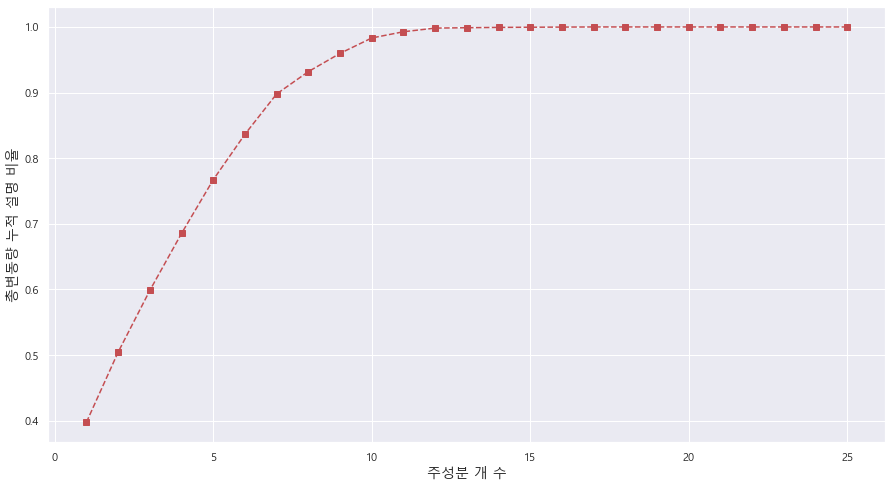

In [92]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.plot(np.arange(1, X.shape[1]+1), np.cumsum(pca.explained_variance_ratio_), 'rs--')
plt.xlabel('주성분 개 수', fontsize='14'); plt.ylabel('총변동량 누적 설명 비율', fontsize='14')

In [93]:
X_pca = PCA(n_components=10).fit(X).transform(X)

In [146]:
from sklearn.covariance import EllipticEnvelope
el = EllipticEnvelope(contamination=y.mean()*2)
el.fit(X_pca)

EllipticEnvelope(contamination=0.01972866331549646)

In [147]:
data = pd.DataFrame((df['판정결과'].values, el.decision_function(X_pca), el.predict(X_pca))).T
data

0             1    2
0      0.0  9.666125e+09  1.0
1      0.0  9.666125e+09  1.0
2      0.0  9.666125e+09  1.0
3      0.0  9.666125e+09  1.0
4      0.0  9.666125e+09  1.0
...    ...           ...  ...
36997  0.0  9.666125e+09  1.0
36998  0.0  7.900614e+09  1.0
36999  0.0  9.666125e+09  1.0
37000  0.0  9.666125e+09  1.0
37001  0.0  9.666125e+09  1.0

[37002 rows x 3 columns]

In [148]:
data.columns =['판정결과', '이상치', '이상치판정']
data

판정결과           이상치  이상치판정
0       0.0  9.666125e+09    1.0
1       0.0  9.666125e+09    1.0
2       0.0  9.666125e+09    1.0
3       0.0  9.666125e+09    1.0
4       0.0  9.666125e+09    1.0
...     ...           ...    ...
36997   0.0  9.666125e+09    1.0
36998   0.0  7.900614e+09    1.0
36999   0.0  9.666125e+09    1.0
37000   0.0  9.666125e+09    1.0
37001   0.0  9.666125e+09    1.0

[37002 rows x 3 columns]

array([[35916,   721],
       [  356,     9]], dtype=int64)

<AxesSubplot:>

recall: 2.4657534246575343,  precision: 1.2328767123287672
              precision    recall  f1-score   support

       적합(0)       0.99      0.98      0.99     36637
      부적합(1)       0.01      0.02      0.02       365

    accuracy                           0.97     37002
   macro avg       0.50      0.50      0.50     37002
weighted avg       0.98      0.97      0.98     37002



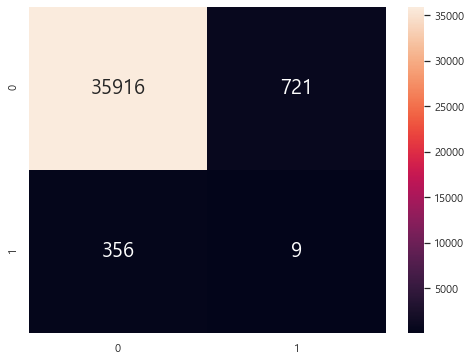

In [149]:
plt.rcParams['figure.figsize'] = [8,6]
data['y_pred']= data['이상치판정'].replace({1:0, -1:1})
data['y_true']= data['판정결과']

from sklearn.metrics import confusion_matrix
cm= confusion_matrix(data['y_true'], data['y_pred'])
cm
sns.heatmap(cm, annot = True, fmt="d", annot_kws={"size": 20})
tn, fp, fn, tp = confusion_matrix(data['y_true'], data['y_pred']).ravel()
print(f'recall: {(tp/(tp+fn)*100)},  precision: {(tp/(tp+fp)*100)}')

from sklearn.metrics import classification_report
target_names = ['적합(0)', '부적합(1)']
print(classification_report(data['y_true'], data['y_pred'], target_names=target_names))

## 3.4. Robust covariance estimation and Mahalanobis distances relevance¶
- https://scikit-learn.org/stable/auto_examples/covariance/plot_mahalanobis_distances.htmlm

In [150]:
from sklearn.covariance import EmpiricalCovariance, MinCovDet
# fit a MCD robust estimator to data
robust_cov = MinCovDet().fit(X_pca)

# fit a MLE estimator to data
emp_cov = EmpiricalCovariance().fit(X_pca)

In [151]:
# Calculate cubic root of MLE Mahalanobis distances for samples
emp_mahal = emp_cov.mahalanobis(X_pca - np.mean(X_pca, 0)) ** (0.33)
# Calculate cubic root of MCD Mahalanobis distances for samples
robust_mahal = robust_cov.mahalanobis(X_pca - robust_cov.location_) ** (0.33)

data['emp_mahal'] = emp_mahal
data['robust_mahal'] = robust_mahal

In [152]:
n_outliers = data.판정결과.value_counts()[1]
n_outliers
n_samples = len(data)

365

{'whiskers': [<matplotlib.lines.Line2D at 0x2551d547ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x2551d5495e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2551d547b80>,
 'medians': [<matplotlib.lines.Line2D at 0x2551d549ca0>,
 'fliers': [<matplotlib.lines.Line2D at 0x25555b45040>,
 'means': []}

[Text(1, 0, 'inliers'), Text(2, 0, 'outliers')]

Text(0, 0.5, '$\\sqrt[3]{\\rm{(Mahal. dist.)}}$')

Text(0.5, 1.0, 'Using non-robust estimates\n(Maximum Likelihood)')

{'whiskers': [<matplotlib.lines.Line2D at 0x25555b4a730>,
 'caps': [<matplotlib.lines.Line2D at 0x25555b4adf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25555b4a3d0>,
 'medians': [<matplotlib.lines.Line2D at 0x2551d8c94f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2551d8c9850>,
 'means': []}

[Text(1, 0, 'inliers'), Text(2, 0, 'outliers')]

Text(0, 0.5, '$\\sqrt[3]{\\rm{(Mahal. dist.)}}$')

Text(0.5, 1.0, 'Using robust estimates\n(Minimum Covariance Determinant)')

{'whiskers': [<matplotlib.lines.Line2D at 0x2551d8bdf40>,
 'caps': [<matplotlib.lines.Line2D at 0x255601d6640>,
 'boxes': [<matplotlib.lines.Line2D at 0x2551d8bdbe0>,
 'medians': [<matplotlib.lines.Line2D at 0x255601d6d00>,
 'fliers': [<matplotlib.lines.Line2D at 0x255601db0a0>,
 'means': []}

[Text(1, 0, 'inliers'), Text(2, 0, 'outliers')]

Text(0, 0.5, '$\\sqrt[3]{\\rm{(Eliiptic. dist.)}}$')

Text(0.5, 1.0, 'Using Multivariate Gaussian Estimates\n(EllipticEnvelope)')

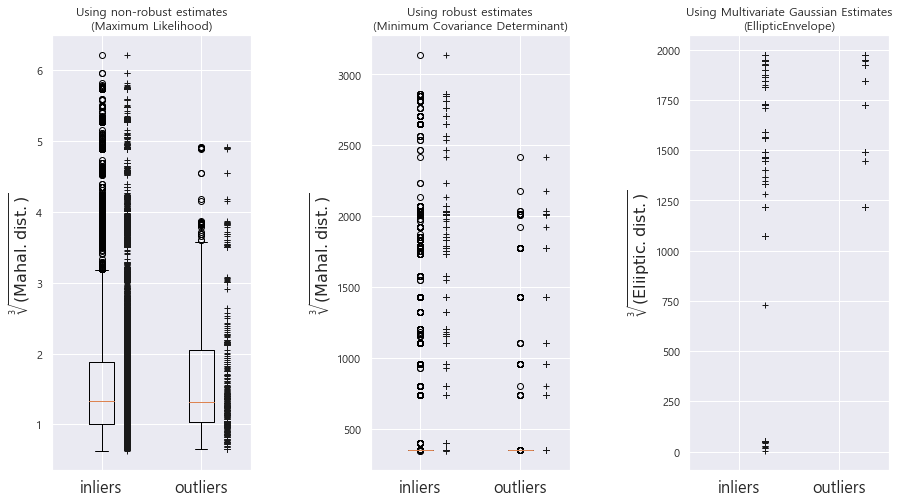

In [153]:
plt.rcParams['figure.figsize'] = [15,8]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
plt.subplots_adjust(wspace=0.6)

# Calculate cubic root of MLE Mahalanobis distances for samples
emp_mahal = emp_cov.mahalanobis(X_pca - np.mean(X_pca, 0)) ** (0.33)
# Plot boxplots
ax1.boxplot([emp_mahal[:-n_outliers], emp_mahal[-n_outliers:]], widths=0.25)
# Plot individual samples
ax1.plot(np.full(n_samples - n_outliers, 1.26), emp_mahal[:-n_outliers], "+k", markeredgewidth=1,)
ax1.plot(np.full(n_outliers, 2.26), emp_mahal[-n_outliers:], "+k", markeredgewidth=1)
ax1.axes.set_xticklabels(("inliers", "outliers"), size=16)
ax1.set_ylabel(r"$\sqrt[3]{\rm{(Mahal. dist.)}}$", size=16)
ax1.set_title("Using non-robust estimates\n(Maximum Likelihood)")

# Calculate cubic root of MCD Mahalanobis distances for samples
robust_mahal = robust_cov.mahalanobis(X_pca - robust_cov.location_) ** (0.33)
# Plot boxplots
ax2.boxplot([robust_mahal[:-n_outliers], robust_mahal[-n_outliers:]], widths=0.25)
# Plot individual samples
ax2.plot(np.full(n_samples - n_outliers, 1.26), robust_mahal[:-n_outliers], "+k", markeredgewidth=1,)
ax2.plot(np.full(n_outliers, 2.26), robust_mahal[-n_outliers:], "+k", markeredgewidth=1)
ax2.axes.set_xticklabels(("inliers", "outliers"), size=16)
ax2.set_ylabel(r"$\sqrt[3]{\rm{(Mahal. dist.)}}$", size=16)
ax2.set_title("Using robust estimates\n(Minimum Covariance Determinant)")

# Calculate cubic root of Eclliptc distances for samples
eclliptic = el.decision_function(X_pca) ** (0.33)
# Plot boxplots
ax3.boxplot([eclliptic[:-n_outliers], eclliptic[-n_outliers:]], widths=0.25)
# Plot individual samples
ax3.plot(np.full(n_samples - n_outliers, 1.26), eclliptic[:-n_outliers], "+k", markeredgewidth=1,)
ax3.plot(np.full(n_outliers, 2.26), eclliptic[-n_outliers:], "+k", markeredgewidth=1)
ax3.axes.set_xticklabels(("inliers", "outliers"), size=16)
ax3.set_ylabel(r"$\sqrt[3]{\rm{(Eliiptic. dist.)}}$", size=16)
ax3.set_title("Using Multivariate Gaussian Estimates\n(EllipticEnvelope)")

plt.show()

## K-fold simulations for validating anomaly detection (k=10) : 생략
# 데이터 줄이기

<Figure size 576x360 with 0 Axes>

<AxesSubplot:xlabel='판정결과', ylabel='emp_mahal'>

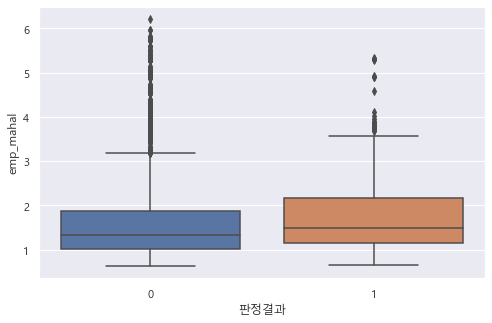

In [111]:
df['emp_mahal'] = emp_mahal
data= df[['판정결과', 'emp_mahal']]
plt.figure(figsize = (8, 5))
sns.boxplot(x='판정결과', y='emp_mahal', data=data)

In [156]:
oulier_max = df[df['판정결과'] == 1]['emp_mahal'].max()
df[df['emp_mahal'] <= oulier_max].shape
df[df['emp_mahal'] >= oulier_max].shape
df.shape

(36946, 232)

(57, 232)

(37002, 232)

In [ ]:
df[df['판정결과']1]

In [113]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [114]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors = 3) #algorithm='ball_tree'
nbrs.fit(X)
distances, indices = nbrs.kneighbors(X) # distances : distances between data points
                                           # indices : associated index values
pd.Series(distances.mean(axis =1)).plot(figsize=(20,4))
plt.title('Distance mean of KNN', fontsize = 18)
plt.xlabel('Instances', fontsize = 16); plt.ylabel('Mean of Distance', fontsize = 16)

NearestNeighbors(n_neighbors=3)

AttributeError: 'NoneType' object has no attribute 'split'

In [115]:
data

판정결과  emp_mahal
접수번호                         
20160085048      0   0.938519
20160081852      0   0.843847
20160087342      0   0.664799
20160085242      0   1.189279
20160086246      0   1.066516
...            ...        ...
202000535510     0   1.445883
202000706307     0   3.689374
202000627624     0   1.134600
202000374022     0   1.395410
202000444415     0   1.107208

[37002 rows x 2 columns]

In [116]:
data['knn3_dist'] = distances.mean(axis =1)
cols= data.drop('y_true', axis=1).columns
fig, ax = plt.subplots(ncols=3, figsize=(25,5))
for i, col in enumerate(cols) :
    if i < 3:
        sns.boxplot(x= 'y_true', y= col, data=data, ax=ax[i])

NameError: name 'distances' is not defined

In [117]:
nu_percentage= data['y_true'].value_counts(normalize=True).iloc[1]
print(f'부적합율(훈련데이터:X_train)은 {nu_percentage*100} %')

KeyError: 'y_true'

In [118]:
nbrsm = NearestNeighbors(algorithm='brute',  n_neighbors = 3, 
                      metric='mahalanobis', metric_params={'V': np.cov(X)})
nbrsm.fit(X)
distances, indices = nbrsm.kneighbors(X) # distances : distances between data points
                                           # indices : associated index values
pd.Series(distances.mean(axis =1)).plot(figsize=(20,4))
plt.title('Distance mean of KNN', fontsize = 18)
plt.xlabel('Instances', fontsize = 16); plt.ylabel('Mean of Distance', fontsize = 16)

NearestNeighbors(algorithm='brute', metric='mahalanobis',
                 metric_params={'V': array([[0.21348301, 0.21330087, 0.21349504, ..., 0.21332167, 0.2119235 ,
        0.21411707],
       [0.21330087, 0.21488565, 0.21402305, ..., 0.21280695, 0.21043569,
        0.2163179 ],
       [0.21349504, 0.21402305, 0.21379892, ..., 0.21318991, 0.21144032,
        0.21508001],
       ...,
       [0.21332167, 0.21280695, 0.21318991, ..., 0.21324596, 0.2119543 ,
        0.21353165],
       [0.2119235 , 0.21043569, 0.21144032, ..., 0.2119543 , 0.21188965,
        0.21053334],
       [0.21411707, 0.2163179 , 0.21508001, ..., 0.21353165, 0.21053334,
        0.21811397]])},
                 n_neighbors=3)

ValueError: The 'VI' parameter is required for the mahalanobis metric when Y is passed.

## Step 1. Low risk food clustering (신속통관)
### 이상치 점수가 어느 정도 이상 낮으면 정상이라고 판정

In [ ]:
min_abonormal = data[data['y_true'] == 1]['anomaly_score'].min()
min_abonormal
data.loc[data['anomaly_score'] < min_abonormal, 'y_true'].sum()

In [119]:
recalls =[]
precisions =[]
f1scores=[]
ratios=[]
thresholds=data['anomaly_score'].quantile(np.arange(0, 1, 0.05))
for threshold in thresholds:
    data['new_abnormal'] = 0
    data.loc[data['anomaly_score'] > threshold, 'new_abnormal'] = 1
    #confusion_matrix(data['y_true'], data['new_abnormal'])
    tn, fp, fn, tp = confusion_matrix(data['y_true'], data['new_abnormal']).ravel()
    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
    f1score = 2*recall*precision/(recall+precision)
    ratio = (tp+fp)/(tn + fp + fn + tp)
    recalls.append(recall)
    precisions.append(precision)
    f1scores.append(f1score)
    ratios.append(ratio)
    print(f'임계값(Anomaly score): {threshold:.2f}, recall: {(tp/(tp+fn)*100):.3f}%,  precision: {(tp/(tp+fp)*100):.3f}%')

KeyError: 'anomaly_score'

In [120]:
def plot_precision_recall_vs_threshold(precisions, recalls, f1scores, ratios, thresholds): 
    plt.rcParams["figure.figsize"] = (15,8)
    plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
    plt.title('분류임계값과 (정밀도, 재현율, F1-score, 양성판정비율)', fontsize='16') 
    plt.plot(thresholds, precisions, 'b-', label='정밀도(Precision)') # 판사
    plt.plot(thresholds, recalls, 'g-', label='재현율(Recall)') # 검사
    plt.plot(thresholds, f1scores, 'r-', label='f1 score(PR조화평균)') # 변호사
    plt.plot(thresholds, ratios, 'k--', label='양성판정비율') # q-ratio
    plt.ylabel('정밀도 /  재현율', fontsize='14') 
    plt.xlabel('분류임계값', fontsize='14') 
    plt.legend(loc='best', fontsize='14') 
    
plot_precision_recall_vs_threshold(precisions, recalls, f1scores, ratios, thresholds)

NameError: name 'thresholds' is not defined

<img src = 'https://wikimedia.org/api/rest_v1/media/math/render/svg/d37e557b5bfc8de22afa8aad1c187a357ac81bdb'>

### 2.1 이상치 탐색 with DTW
- 모든 특성변수는 자료표준화가 되어 0~1 사이의 값으로 존재하게 되어 dtw(dynamic time warping)거리fmf 기준으로 Anomaly detection
- https://en.wikipedia.org/wiki/Dynamic_time_warping
- https://dinhanhthi.com/dynamic-time-warping-dtw/

In [121]:
from tslearn.clustering import TimeSeriesKMeans
km = TimeSeriesKMeans(n_clusters=2, metric="dtw")
km.fit(X)
y_pred = km.fit_predict(X)
y_score = km.fit_transform(X)

AttributeError: 'NoneType' object has no attribute 'split'

In [122]:
del data['new_abnormal']

KeyError: 'new_abnormal'

In [123]:
data['y_pred_dtw'] = y_pred
data['y_normal_score_dtw'] = y_score[:, 0]
data['y_abnormal_score_dtw'] = y_score[:, 1]
data.head()

NameError: name 'y_pred' is not defined

In [124]:
data['y_normal_score_dtw'] = data['y_normal_score_dtw']/(data['y_normal_score_dtw'] + data['y_abnormal_score_dtw'])
data['y_abnormal_score_dtw']= data['y_abnormal_score_dtw']/(data['y_normal_score_dtw'] + data['y_abnormal_score_dtw'])
data.head()

KeyError: 'y_normal_score_dtw'

In [ ]:
cm = confusion_matrix(data['y_true'], data['y_pred_dtw'])
cm
sns.heatmap(cm, annot = True, fmt="d", annot_kws={"size": 20})
tn, fp, fn, tp = confusion_matrix(data['y_true'], data['y_pred_dtw']).ravel()
tn, fp, fn, tp 
print(f'recall: {tp/(tp+fn)},  precision: {tp/(tp+fp)}')

In [125]:
from sklearn.metrics import classification_report
target_names = ['적합(0)', '부적합(1)']
print(classification_report(data['y_true'], data['y_pred_dtw'], target_names=target_names))

KeyError: 'y_true'

In [126]:
from sklearn.metrics import precision_recall_curve

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')
p, r, thresholds = precision_recall_curve(data['y_true'], data['y_abnormal_score_dtw'])

scores = [np.sum(to_labels(data['y_abnormal_score_dtw'], t))/len(data) for t in thresholds]

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.rcParams["figure.figsize"] = (15,6)
    plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
    plt.title('분류임계값과 (정밀도, 재현율, F1-score, 양성판정비율)', fontsize='16') 
    plt.plot(thresholds, precisions[:-1], 'b-', label='정밀도(Precision)') # 판사
    plt.plot(thresholds, recalls[:-1], 'g-', label='재현율(Recall)') # 검사
    plt.plot(thresholds, (2*precisions[:-1]*recalls[:-1])/(precisions[:-1] +recalls[:-1]), 
             'r-', label='f1 score(PR조화평균)') # 변호사
    plt.plot(thresholds, scores, 'k--', label='양성판정비율') # q-ratio
    plt.ylabel('정밀도 /  재현율', fontsize='14') 
    plt.xlabel('분류임계값', fontsize='14') 
    plt.legend(loc='best', fontsize='14') 
    
plot_precision_recall_vs_threshold(p, r, thresholds)

KeyError: 'y_true'

In [127]:
data

판정결과  emp_mahal
접수번호                         
20160085048      0   0.938519
20160081852      0   0.843847
20160087342      0   0.664799
20160085242      0   1.189279
20160086246      0   1.066516
...            ...        ...
202000535510     0   1.445883
202000706307     0   3.689374
202000627624     0   1.134600
202000374022     0   1.395410
202000444415     0   1.107208

[37002 rows x 2 columns]

KeyError: 'y_normal_score_dtw'

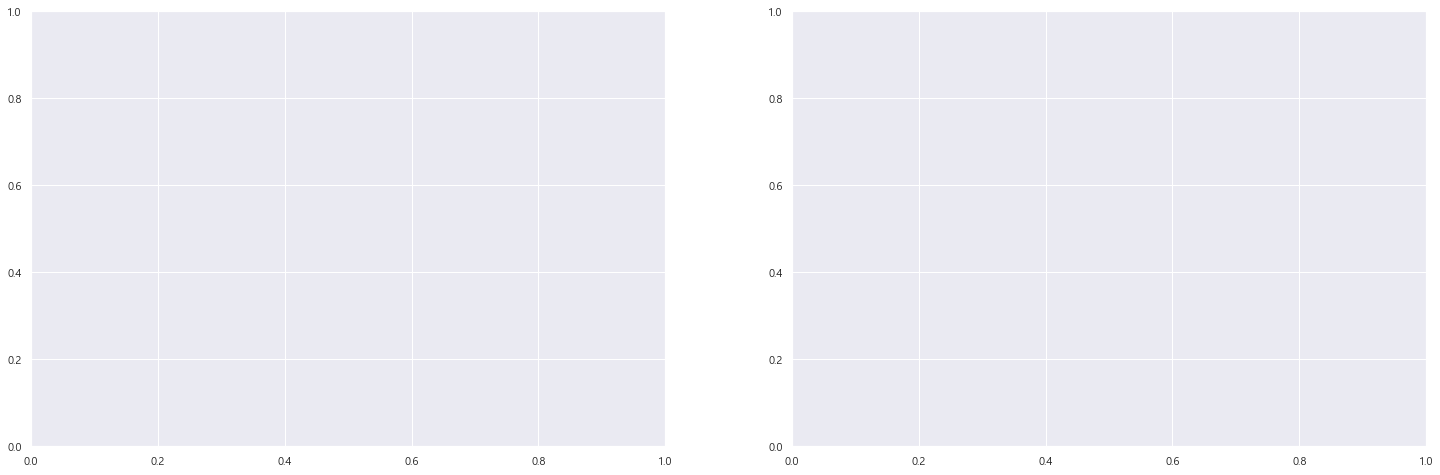

In [128]:
fig, ax = plt.subplots(ncols=2, figsize=(25,8))
sns.scatterplot(data['y_normal_score_dtw'], data['y_abnormal_score_dtw'], c = data['y_pred_dtw'],
                cmap = 'coolwarm', alpha=0.1, ax=ax[0])
sns.scatterplot(data['y_normal_score_dtw'], data['y_abnormal_score_dtw'], c = data['y_true'],
                cmap = 'coolwarm', ax=ax[1])

In [129]:
plt.figure(figsize = (15, 5))
ax = plt.scatter(data['y_normal_score_dtw'], data['y_abnormal_score_dtw'], c = data['y_pred_dtw'], 
                 cmap = 'coolwarm', alpha=0.1)
plt.xlabel('normal_score'); plt.ylabel('anomaly_score')
plt.colorbar(label = '-1: Anomaly; +1: Not Anomaly')

<Figure size 1080x360 with 0 Axes>

KeyError: 'y_normal_score_dtw'

<Figure size 1080x360 with 0 Axes>

In [130]:
ax = plt.scatter(data['y_normal_score_dtw'], data['y_abnormal_score_dtw'], c = data['y_true'], 
                 cmap = 'coolwarm')
plt.xlabel('normal_score'); plt.ylabel('anomaly_score')
plt.colorbar(label = '-1: Anomaly; +1: Not Anomaly')

KeyError: 'y_normal_score_dtw'

In [131]:
data.head()

판정결과  emp_mahal
접수번호                        
20160085048     0   0.938519
20160081852     0   0.843847
20160087342     0   0.664799
20160085242     0   1.189279
20160086246     0   1.066516

In [132]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[data['y_true'] == 1, 'y_abnormal_score_dtw'], color='red', shade=True, label='부적합')
ax=sns.kdeplot(data.loc[data['y_true'] == 0, 'y_abnormal_score_dtw'], color='blue', shade=True, label='적합')
plt.legend()
plt.title('이상치 점수와 적합부적합', fontsize =15)

KeyError: 'y_true'

<Figure size 1080x288 with 0 Axes>

### 부적합 판정결과의 이상치수치가 upper/lower limit 이상이하인 데이터는 제외

In [133]:
sns.boxplot(x = "y_true", y = "y_abnormal_score_dtw", data = data)

ValueError: Could not interpret input 'y_true'

In [134]:
data.head()

판정결과  emp_mahal
접수번호                        
20160085048     0   0.938519
20160081852     0   0.843847
20160087342     0   0.664799
20160085242     0   1.189279
20160086246     0   1.066516

In [135]:
data['y_abnormal_score_dtw'].max()

KeyError: 'y_abnormal_score_dtw'

In [136]:
data[data['y_abnormal_score_dtw'] > max_abonormal]['y_true'].sum()
data[data['y_normal_score_dtw'] > max_abonormal]['y_true'].sum()

KeyError: 'y_abnormal_score_dtw'

In [137]:
max_abonormal = data[data['y_true'] == 1]['y_abnormal_score_dtw'].max()
max_abonormal
data.loc[data['y_normal_score_dtw'] > max_abonormal, 'y_true']
data.loc[data['y_normal_score_dtw'] > max_abonormal, 'y_true'].sum()

KeyError: 'y_true'

In [138]:
index = data[~((data['y_score_0'] < l_fence) | (data['y_score_0'] > u_fence))].index

KeyError: 'y_score_0'

In [139]:
index

NameError: name 'index' is not defined

### Algorithm selection for Anomaly Detection
- https://medium.com/analytics-vidhya/algorithm-selection-for-anomaly-detection-ef193fd0d6d1
<img src= 'https://miro.medium.com/max/1072/1*OIXCo35Vvzr9qoUbV2fHMA.png'>

### <font color='brown'> Unsupervised learning anomaly detection methods
<img src='https://miro.medium.com/max/1540/1*7yJ2KiW3RFHP2nJppTP4mw.png'>

# 3. 지도학습 예측
- 이상치 score로 downsizing된 데이터를 만든다

In [140]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix, classification_report

In [109]:
df.columns[20:30]

Index(['과세가격($/Kg)', '과세가격', '고열량.저영양', '가온보존대상', '가당', '가미', '가수', '가수분해',
       '가압', '가압+탈수+원심분리'],
      dtype='object')

In [110]:
data = df[df.index.isin(index)]
data.shape
data.head()

NameError: name 'index' is not defined

- 훈련/검증 데이터 분리

In [144]:
df.columns[0:30]

Index(['해외제조업소명', '해외제조업소 지역', '품목코드', '품목명', '판정결과', '진균수시험대상', '주문자상표부착',
       '제품명(한글)', '제조국(원산지)', '유전자변형식품', '유기식품 여부', '용도명', '영유아섭취대상', '신속검사대상',
       '식품조사처리 여부', '순중량(Kg)', '수입화주 상호', '선적항명', '방사선조사식품', '대행업자 사업자등록번호',
       '과세가격($/Kg)', '과세가격', '고열량.저영양', '가온보존대상', '가당', '가미', '가수', '가수분해',
       '가압', '가압+탈수+원심분리'],
      dtype='object')

In [25]:
X = data.drop('판정결과', axis=1)
y = data['판정결과']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2)

In [28]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

In [38]:
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=3)
    
    numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
    categorical_transformer = Pipeline(steps=[('catencoder', ce.woe.WOEEncoder())])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier())])
        
    grid_search = RandomizedSearchCV(pipe, {}, 
                                     scoring='recall', 
                                     refit = refit_score,
                                     cv = skf, 
                                     return_train_score=True, n_jobs=-1)
    
    grid_search.fit(X_train, y_train)

    # make the predictions
    y_pred = grid_search.predict(X_test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    print(classification_report(y_test, y_pred))
    
    return grid_search

In [43]:
grid_search_clf = grid_search_wrapper(refit_score='precision_score')

Best params for precision_score
{}

Confusion matrix of Random Forest optimized for precision_score on the test data:
     pred_neg  pred_pos
neg     13539        13
pos       157         2
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13552
           1       0.13      0.01      0.02       159

    accuracy                           0.99     13711
   macro avg       0.56      0.51      0.51     13711
weighted avg       0.98      0.99      0.98     13711



# 3. Oversampling 예측
- recall 이 높은 알고리즘 선택

In [44]:
from imblearn.under_sampling import *
from imblearn.pipeline import Pipeline, make_pipeline  # scikit-learn의 pipeline을 사용하지 마라!

In [45]:
randomseed = 1024

def classification_result_imbalance(imbalance_method=RandomUnderSampler(random_state=randomseed), refit_score='recall_score'):
    skf = StratifiedKFold(n_splits=3)
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    categorical_transformer = Pipeline(steps=[('catencoder', ce.woe.WOEEncoder())])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('imbalance sampler', imbalance_method),
        ('classifier', RandomForestClassifier())])
    
    smote_pipeline = make_pipeline(preprocessor,
                                   imbalance_method,
                                   RandomForestClassifier())
    
    grid_search = RandomizedSearchCV(smote_pipeline, {},
                                     scoring= 'recall', 
                                     refit = refit_score,
                                     cv = skf)
    
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_pred))  
    return grid_search

In [47]:
under_sampling_methods = [RandomUnderSampler(random_state=randomseed)]

for mine in under_sampling_methods:
    mine
    grid_search_clf = classification_result_imbalance(imbalance_method=mine, refit_score='recall_score')

RandomUnderSampler(random_state=1024)

              precision    recall  f1-score   support

           0       1.00      0.74      0.85     13552
           1       0.03      0.74      0.06       159

    accuracy                           0.74     13711
   macro avg       0.51      0.74      0.46     13711
weighted avg       0.98      0.74      0.84     13711



# End

## Word2vect (제조공정 데이터로 부터)

In [29]:
corpus =[]
for _, g in manu.groupby('접수번호'):
    corpus.append(g['제조공정분류명칭'].to_list())

In [34]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=corpus, size=100, window=5, min_count=10, workers=4, sg=0)

In [44]:
model.wv.most_similar("혼합")
model.wv.vectors.shape
pd.DataFrame(model.wv.vectors)

[('포장', 0.44076091051101685),
 ('냉각', 0.42891186475753784),
 ('저장', 0.3665075898170471),
 ('토핑', 0.3580535650253296),
 ('금속검출검사또는금속검출', 0.34253883361816406),
 ('조미', 0.31152433156967163),
 ('냉동', 0.2875955402851105),
 ('코팅', 0.2789650857448578),
 ('가미', 0.27417173981666565),
 ('충전', 0.24959605932235718)]

(200, 100)

0    1     2     3     4     5     6     7     8     9   ...    90  \
0   -0.66 0.26  1.15  0.85 -1.06  0.24 -1.01 -0.12 -0.47 -0.77  ... -0.55   
1   -0.43 0.16  0.61 -0.13  0.37  0.64 -0.71  0.16  0.70 -0.57  ...  1.23   
2   -0.91 0.51  1.09  0.60  0.11  1.10  1.16  0.37  0.26 -0.36  ... -0.74   
3   -0.69 0.10  0.79  0.34  0.67  0.55 -0.93  1.21 -0.27 -0.90  ...  0.23   
4   -0.82 1.76  0.10  0.17  1.35  0.12 -1.74 -1.18  0.31  0.70  ...  1.82   
..    ...  ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
195 -0.03 0.00  0.01 -0.06  0.03 -0.05  0.06 -0.02  0.02 -0.10  ... -0.04   
196 -0.02 0.01 -0.17  0.14 -0.05  0.04  0.03 -0.00  0.08  0.12  ... -0.10   
197 -0.06 0.05  0.02 -0.01  0.05 -0.07  0.07  0.00  0.01 -0.08  ... -0.02   
198  0.07 0.06  0.02  0.00  0.09 -0.01 -0.00  0.02  0.03  0.03  ... -0.10   
199  0.01 0.12  0.07 -0.10  0.02  0.24 -0.01 -0.04 -0.00 -0.08  ... -0.07   

       91    92    93    94    95    96    97    98    99  
0    0.02 -0.09  2.05  0.44 -0.51  0.02 -0.96  0.92  0.46  
1   -0.18  0.36  1.83  0.29 -0.50  1.68 -1.66  1.01  1.18  
2    0.04  0.08 -0.22 -0.24 -1.60 -0.19 -0.96  1.76 -0.61  
3   -1.02  0.78  0.21 -0.89 -0.78  0.20 -0.25  0.31  1.32  
4   -1.26  0.29 -0.16  0.08  0.37  0.52 -0.46 -0.36  0.35  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
195 -0.05  0.02 -0.00  0.05 -0.01  0.04 -0.05 -0.07 -0.05  
196 -0.03 -0.05  0.18  0.02 -0.07  0.08  0.04  0.13  0.07  
197 -0.01 -0.05  0.03  0.06 -0.11  0.10  0.04 -0.01 -0.00  
198 -0.10 -0.07  0.01  0.06 -0.22  0.23  0.06  0.08  0.01  
199 -0.17 -0.09  0.12  0.08  0.08 -0.00 -0.00 -0.09  0.05  

[200 rows x 100 columns]

In [48]:
# 단어벡터를 구한다.
word_vectors = model.wv
word_vectors
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]
len(word_vectors_list)
from sklearn.metrics.pairwise import cosine_similarity

cosinematrix = pd.DataFrame(cosine_similarity(word_vectors_list,dense_output=False), columns=vocabs)
cosinematrix.index = vocabs
cosinematrix.style.background_gradient(axis=0)  

200

<AxesSubplot:>

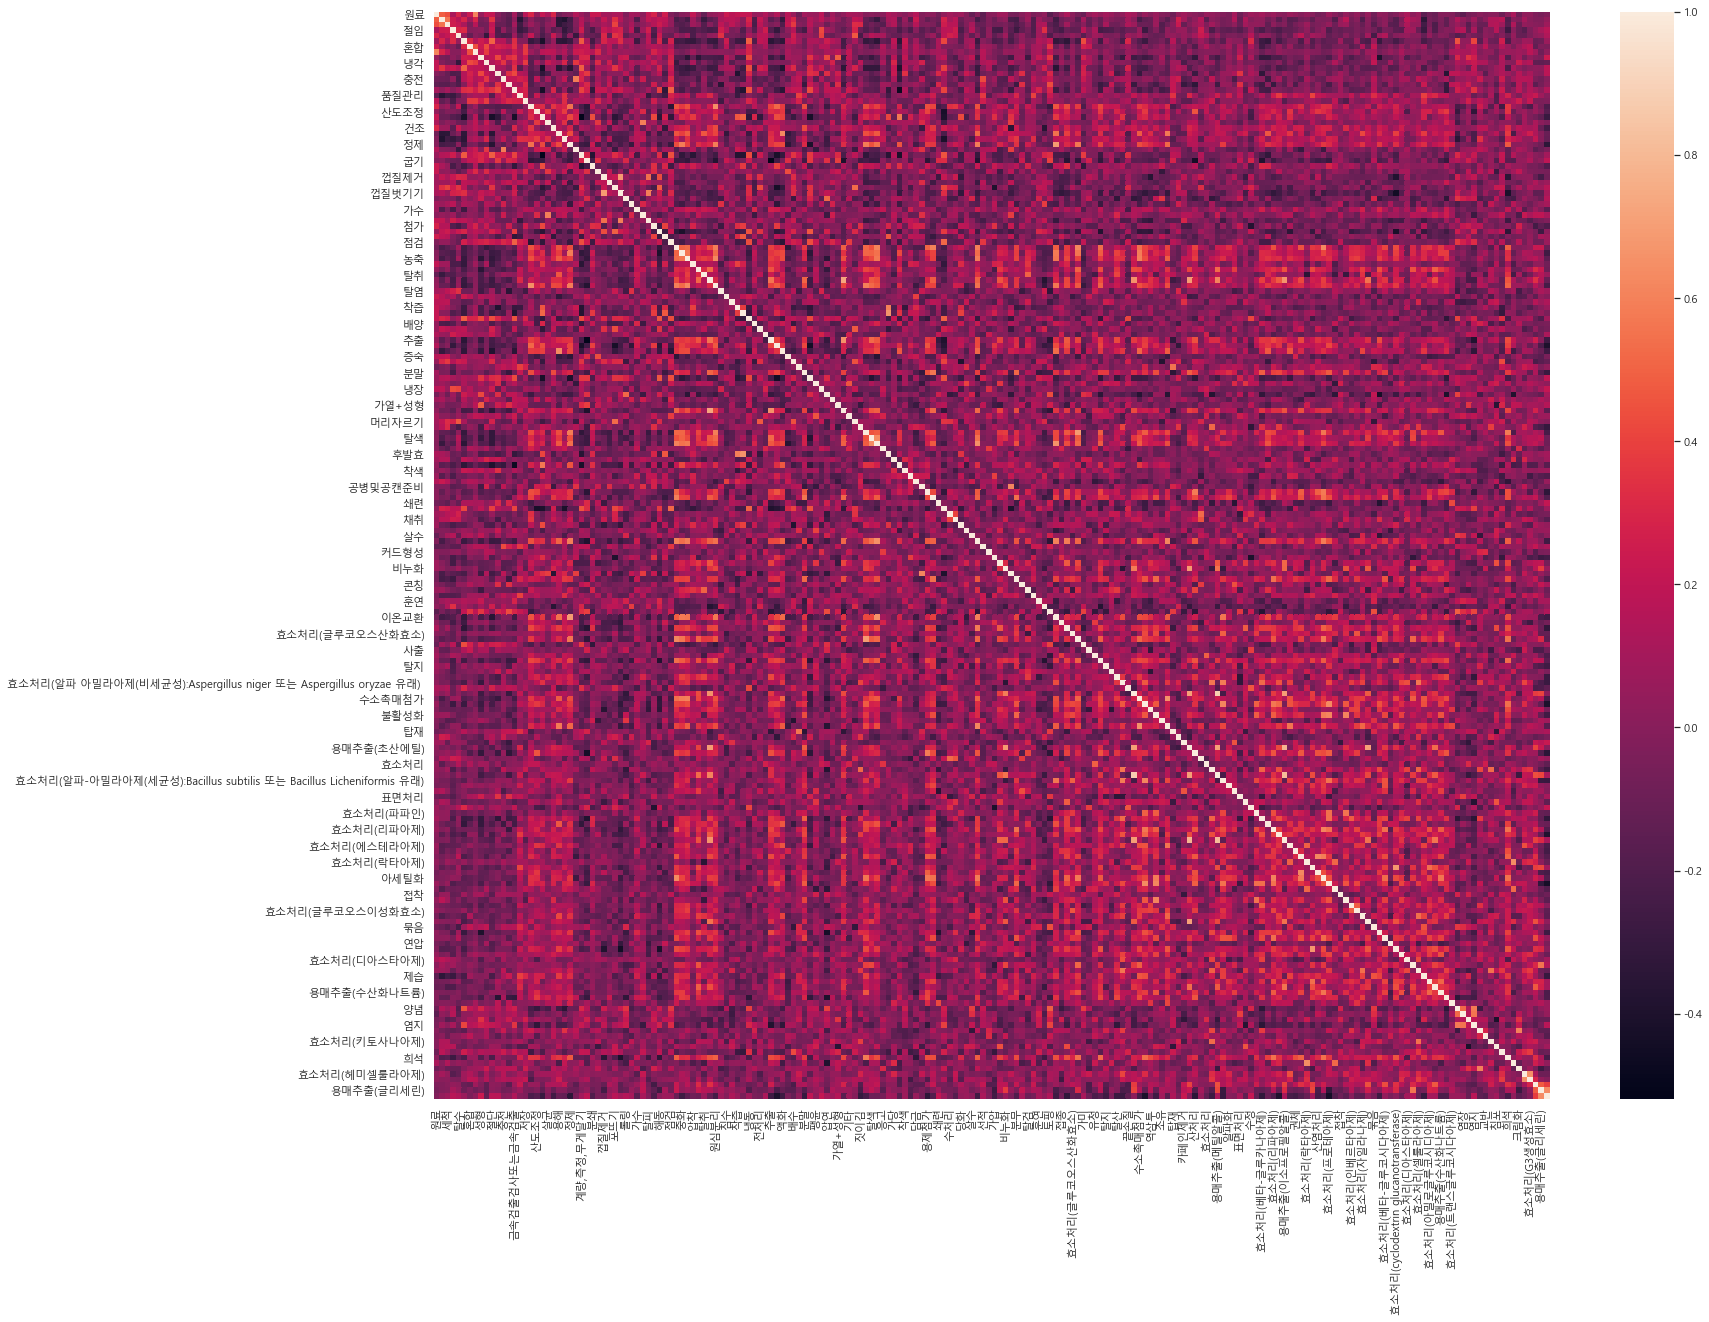

In [49]:
sns.set(rc = {'figure.figsize':(25,20)})
plt.rcParams['font.family']='Malgun Gothic'
sns.heatmap(cosinematrix)

#  2. Semi-Supervised learning (Novelty detection)
## One-class SVM with non-linear kernel (RBF)
- OCSVM assumes that anomalies can form dense clusters as long as they form a low-density region in the training dataset.
- OCSVM mode is trained in only one class, referred to as the normal class. The model learns all the features and patterns of the normal class 
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html#sklearn.svm.OneClassSVM

#### <p> <font color= 'blue'> Intuition : One-class SVM is based on SVM, which uses a hyperplane to seperate two classes while a  <b>One-class SVM uses a hypersphere to emcompass all of the observations<b> <p>

In [105]:
df= tf.copy()
train_rec_count=int(len(df)*.8)
df_train= df.iloc[:train_rec_count,:]
df_train.shape
df_train.head()
df_train['판정결과'].value_counts(normalize=True)

(11004, 14)

유형       용도명  제조국(원산지)  과세가격($/Kg)   유기식품 여부   영유아섭취대상  \
1663960  0.000000  0.011355  0.001769    0.000500  0.011347  0.011487   
2312845  0.008032  0.011355  0.001769    0.000375  0.011347  0.011487   
2205920  0.017202  0.018927  0.001769    0.000421  0.011347  0.011487   
1644698  0.011173  0.011355  0.009709    0.000278  0.011347  0.011487   
2063361  0.010169  0.011355  0.001769    0.000494  0.011347  0.011487   

          주문자상표부착   유전자변형식품    가온보존대상   진균수시험대상   방사선조사식품  판정결과  순중량(Kg)_log  \
1663960  0.011562  0.012078  0.011502  0.011092  0.011459     0     0.568702   
2312845  0.011562  0.012078  0.011502  0.011092  0.011459     0     0.472120   
2205920  0.011562  0.012078  0.011502  0.011092  0.011459     0     0.828743   
1644698  0.011562  0.012078  0.011502  0.011092  0.011459     0     0.335609   
2063361  0.011562  0.012078  0.011502  0.011092  0.011459     0     0.396945   

         과세가격_log  
1663960  0.664566  
2312845  0.553561  
2205920  0.881663  
1644698  0.405416  
2063361  0.510000

0    0.987732
1    0.012268
Name: 판정결과, dtype: float64

In [107]:
df_test=df.iloc[train_rec_count:,:]
df_test.shape
df_test.head()
df_test['판정결과'].value_counts(normalize=True)

(2751, 14)

유형       용도명  제조국(원산지)  과세가격($/Kg)   유기식품 여부   영유아섭취대상  \
1787451  0.000000  0.011355  0.006404    0.003122  0.011347  0.011487   
2322748  0.000000  0.011355  0.006404    0.000424  0.011347  0.011487   
383035   0.000000  0.011355  0.000000    0.000246  0.011347  0.011487   
1851180  0.008032  0.011355  0.001769    0.001867  0.011347  0.011487   
350816   0.000000  0.011355  0.001769    0.001948  0.011347  0.011487   

          주문자상표부착   유전자변형식품    가온보존대상   진균수시험대상   방사선조사식품  판정결과  순중량(Kg)_log  \
1787451  0.011562  0.012078  0.011502  0.011092  0.011459     0     0.379082   
2322748  0.011562  0.012078  0.011502  0.011092  0.011459     0     0.512088   
383035   0.011562  0.012078  0.011502  0.011092  0.011459     0     0.734091   
1851180  0.011562  0.012078  0.011502  0.011092  0.011459     0     0.556829   
350816   0.011562  0.012078  0.011502  0.027950  0.011459     0     0.391934   

         과세가격_log  
1787451  0.652285  
2322748  0.599961  
383035   0.751004  
1851180  0.767218  
350816   0.623295

0    0.991639
1    0.008361
Name: 판정결과, dtype: float64

### 정상과 비정상이 있는 훈련데이터(X_train, y_train)

In [108]:
X_train= df_train.drop('판정결과', axis=1)
y_train= df_train['판정결과']
y_train.value_counts(normalize=True)
X_train.shape, y_train.shape

0    0.987732
1    0.012268
Name: 판정결과, dtype: float64

((11004, 13), (11004,))

### 검증데이터(X_test)

In [109]:
X_test= df_test.drop('판정결과', axis=1)
y_test= df_test['판정결과']
y_test.value_counts(normalize=True)
X_test.shape, y_test.shape

0    0.991639
1    0.008361
Name: 판정결과, dtype: float64

((2751, 13), (2751,))

### Creating the One-Class Support Vector Macine

In [110]:
nu_percentage= df_train['판정결과'].value_counts(normalize=True).iloc[1]
print(f'부적합율(훈련데이터:X_train)은 {nu_percentage*100} %')

부적합율(훈련데이터:X_train)은 1.2268266085059978 %


In [111]:
from sklearn.svm import OneClassSVM
ocsvm = OneClassSVM(nu=nu_percentage) # OneClassSVM(kernel='rbf', nu=0.0005, gamma=0.007)

In [127]:
ocsvm.get_params()

{'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'nu': 0.012268266085059978,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## 2.1. 지도학습 : 지도학습후 예측결과(yhat)와 실제자료(df_test)와 비교 

In [119]:
df_test.판정결과.value_counts()
df_test.onesvm_anomaly.value_counts()

0    2728
1      23
Name: 판정결과, dtype: int64

 1    2721
-1      30
Name: onesvm_anomaly, dtype: int64

OneClassSVM(nu=0.012268266085059978)

<AxesSubplot:>

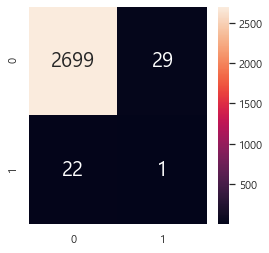

In [125]:
ocsvm.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix

yhat=ocsvm.predict(X_test)

df_test['onesvm_anomaly']= yhat
df_test['onesvm_anomaly'] = df_test['onesvm_anomaly'].replace({1:0,-1:1})

cm=confusion_matrix(df_test['판정결과'], df_test['onesvm_anomaly'])
plt.rcParams["figure.figsize"] = (4,4)
sns.heatmap(cm, annot = True, fmt="d", annot_kws={"size": 20})

In [126]:
from sklearn.metrics import classification_report
target_names = ['Normal(1)', 'Abnormal(-1)']
print(classification_report(df_test['판정결과'], df_test['onesvm_anomaly'], target_names=target_names))

              precision    recall  f1-score   support

   Normal(1)       0.99      0.99      0.99      2728
Abnormal(-1)       0.03      0.04      0.04        23

    accuracy                           0.98      2751
   macro avg       0.51      0.52      0.51      2751
weighted avg       0.98      0.98      0.98      2751



In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(" Accuracy Score for One-Class SVM :", accuracy_score(df_test['판정결과'], df_test['onesvm_anomaly']))
print(" Precision for One-Class SVM :", precision_score(df_test['판정결과'], df_test['onesvm_anomaly']))
print(" Recall for One-Class SVM :", recall_score(df_test['판정결과'], df_test['onesvm_anomaly']))
print(" Confusion Matrix: \n", cm)

 Accuracy Score for One-Class SVM : 0.9814612868047983
 Precision for One-Class SVM : 0.03333333333333333
 Recall for One-Class SVM : 0.043478260869565216
 Confusion Matrix: 
 [[2699   29]
 [  22    1]]


## 2.2. 비지도학습 훈련

In [ ]:
ocsvm = OneClassSVM(nu=nu_percentage)
ocsvm.fit(X_train)

<AxesSubplot:>

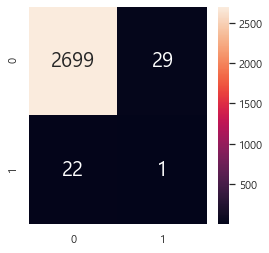

In [132]:
yhat=ocsvm.predict(X_test)

df_test['onesvm_anomaly']= yhat
df_test['onesvm_anomaly'] = df_test['onesvm_anomaly'].replace({1:0,-1:1})
cm=confusion_matrix(df_test['판정결과'], df_test['onesvm_anomaly'])
plt.rcParams["figure.figsize"] = (4,4)
sns.heatmap(cm, annot = True, fmt="d", annot_kws={"size": 20})

## 2.3. 준지도학습 훈련